In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
\
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker

Welcome to JupyROOT 6.26/04


In [2]:
def draw_2D_grid(numpy_data):

    fig, ax = plt.subplots(dpi=130, figsize=(6.4, 4.4 / 0.8))
    z = np.flip(numpy_data, axis=1)
    z = np.transpose(z)

    #im = ax.imshow(z, vmin=0, vmax=1, cmap=plt.get_cmap("Reds"))
    im = ax.imshow(z, vmin=0, vmax=1, cmap=cm.YlGn)


    # We want to show all ticks...
    xbin_edges = xedge
    ybin_edges = yedge[::-1]
    ax.set_xticks(np.arange(len(xbin_edges)) - 0.5)
    # ax.set_yticks(np.arange(len(ybin_edges)) - 0.5)
    # ax.set_xticks(np.arange(len(xbin_edges)) + 0.5 )
    ax.set_yticks(np.arange(len(ybin_edges)) - 0.5 )

    # ax.set_yticks(np.arange(len(ybin_edges)) + 0.5 )
    # ... and label them with the respective list entries
    ax.set_xticklabels([f"{x:.1f}" for x in xbin_edges])
    ax.set_yticklabels([f"{y:.1f}" for y in ybin_edges])

    ax.set_xlabel(r"$\cos\theta$")
    ax.set_ylabel(r"$p_\gamma \; [\mathrm{GeV/c}]$")
    
    ax.grid(ls='-', lw=2)

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = ax.figure.colorbar(im, ax=ax, cax=cax)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    # ax.set_xticks(np.arange(z[1]+1)-.5, minor=True)
    # ax.set_yticks(np.arange(z[0]+1)-.5, minor=True)
    ax.grid(which="major", color="black", linestyle='-', linewidth=1.2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ybin_edges)-1):
        for j in range(len(xbin_edges)-1):

    #     t = "%.1f%%"%(zval * 100,) # format value with 1 decimal point
            c = 'w' if z[i,j] > 0.75 else 'black' # if dark-green, change text color to white

            input_text = None if math.isnan(z[i, j]) ==True else f"{z[i, j]:.3f}"
            text = ax.text(j, i, input_text,
                            ha="center", va="center", color=c, fontsize=8)

# antiKstar pi0

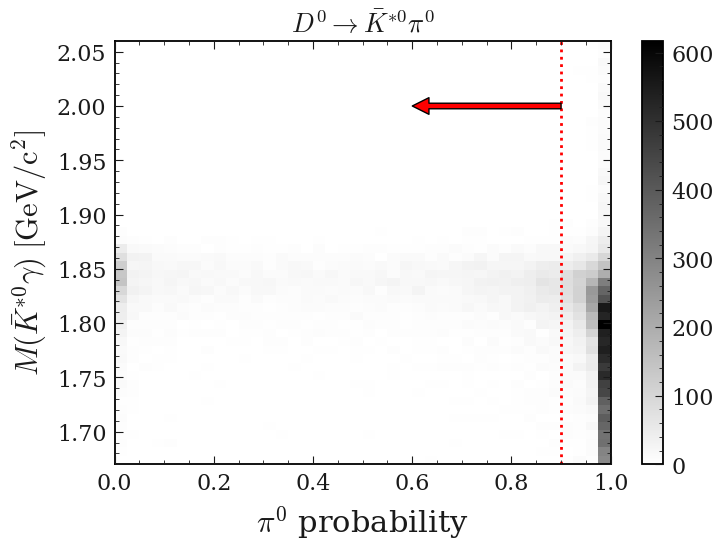

In [5]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v14_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v16_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'



tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
y1=pd_antiKstarpi0_sigMC['D0_M']
x1=pd_antiKstarpi0_sigMC['Pi0_Prob']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.binary)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M(\bar{K}^{*0} \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.9, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.90,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## no MC matched

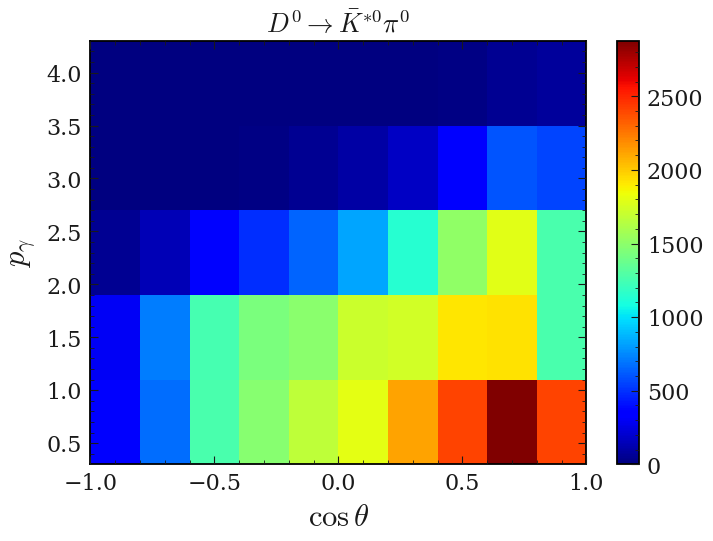

In [4]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v11_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v14_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v16_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'

tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [6]:
pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

 111.0     21914
 0.0          34
 221.0        18
-423.0        10
 11.0          7
-211.0         7
 223.0         7
 22.0          5
 311.0         5
 23.0          5
 130.0         4
 211.0         4
-2212.0        4
 310.0         3
 213.0         2
 321.0         2
 113.0         2
-421.0         2
-2112.0        2
-321.0         1
 331.0         1
Name: gamma_genMotherPDG, dtype: int64

In [7]:
pd_antiKstarpi0_sigMC['Pi0_soft_genMotherPDG'].value_counts()

 111.0        15960
 0.0           5127
-321.0          149
 211.0          139
-211.0          107
-13.0            91
 22.0            56
-313.0           49
-2212.0          38
 221.0           38
 11.0            32
 321.0           32
 413.0           31
 130.0           29
 23.0            25
-2112.0          18
 113.0           14
-423.0           12
 223.0           12
-433.0           10
 13.0            10
 310.0            9
 311.0            8
-213.0            7
-413.0            5
-421.0            5
-411.0            4
 313.0            3
 213.0            3
 331.0            2
-311.0            2
-431.0            2
 3212.0           1
-323.0            1
 20423.0          1
 3122.0           1
-3112.0           1
 9000221.0        1
 323.0            1
-2214.0           1
 2214.0           1
 2112.0           1
Name: Pi0_soft_genMotherPDG, dtype: int64

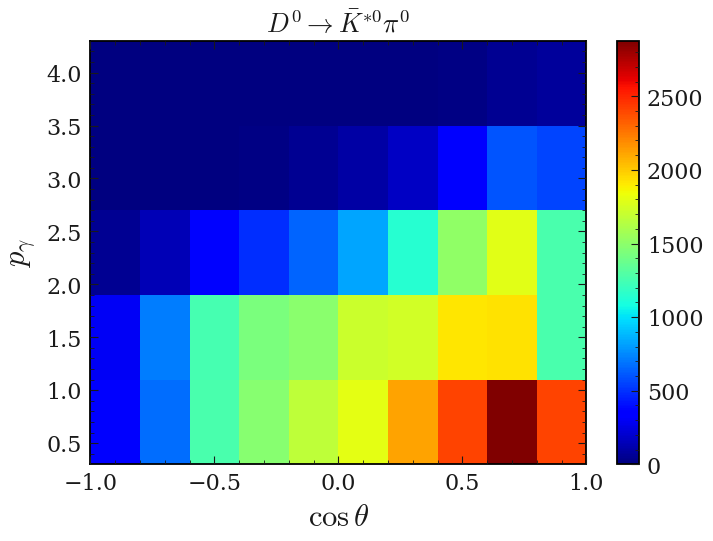

In [5]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v11_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v14_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v16_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'

tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.90'
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [9]:
pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

 111.0     7691
 0.0          5
 221.0        4
 22.0         3
 311.0        2
 23.0         2
 223.0        2
-423.0        1
 213.0        1
 211.0        1
 11.0         1
-2212.0       1
-2112.0       1
-211.0        1
Name: gamma_genMotherPDG, dtype: int64

In [10]:
pd_antiKstarpi0_sigMC['Pi0_soft_genMotherPDG'].value_counts()

 0.0       4201
 111.0     3037
-321.0      101
 211.0       68
-13.0        54
-211.0       51
 22.0        34
-313.0       30
-2212.0      19
 11.0        16
 130.0       14
 321.0       14
 221.0       11
 13.0         7
 113.0        7
-2112.0       7
 23.0         6
 413.0        6
 310.0        5
-423.0        4
-421.0        4
 223.0        4
-213.0        3
 311.0        3
-433.0        2
 313.0        2
 213.0        1
-431.0        1
 3122.0       1
 331.0        1
 323.0        1
-411.0        1
Name: Pi0_soft_genMotherPDG, dtype: int64

/tmp/ipykernel_7037/488407905.py:10: RuntimeWarning: invalid value encountered in true_divide
  h = h2 / h1


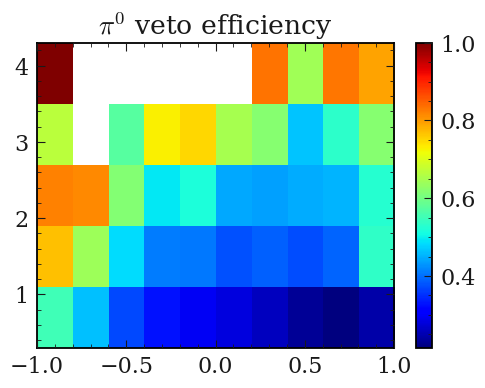

In [7]:
# xedge = [-1, -0.8, -0.6,-0.4, -0.2 , 0 , 0.2 , 0.4 , 0.6, 0.8, 1]
# yedge = [0,0.5, 1,1.5, 2,2.5, 3,3.5, 4]


yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

In [8]:
# xedge = [-1, -0.8, -0.6,-0.4, -0.2 , 0 , 0.2 , 0.4 , 0.6, 0.8, 1]
# yedge = [0.,0.5, 1,1.5, 2,2.5, 3,3.5, 4]
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)
h1_data, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2_data, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
# h_realmother_pi0= h2_data / h1_data


h_random= h2_data / h1_data



/tmp/ipykernel_7037/2754532536.py:10: RuntimeWarning: invalid value encountered in true_divide
  h_random= h2_data / h1_data


## old grid plots

In [29]:
z = np.flip(h_realmother_pi0, axis=1) # generate random data
# z = np.flip(z, axis=1)
nx, ny = z.shape
indx, indy = np.arange(nx), np.arange(ny)

# indx = indx[::-1]
indy = indy[::-1]
x, y = np.meshgrid(indx, indy)

fig, ax = plt.subplots()
ax.imshow(z.T, interpolation="nearest", cmap=cm.YlGn) # plot grid values

for xval, yval in zip(x.flatten(), y.flatten()):
    zval = z[xval, yval]
    t = "%.1f%%"%(zval * 100,) # format value with 1 decimal point
    c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(xval, yval, t, color=c, va='center', ha='center',size=10)

#xlabels = 'abcdefghij'
xlabels = [-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9]
ylabels = [0.25, 0.75,1.25, 1.75,2.25, 2.75,3.25, 3.75]
#ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
#ax.set_yticks(indy+0.5)

ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
ax.grid(ls='-', lw=2)

# the tick labels, if you want them centered need to be adjusted in 
# this special way.
# for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy), 
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy),                          
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    #ind=ind-0.4
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

ax.xaxis.tick_top()

plt.ylabel("$p_\gamma$")
plt.xlabel(r"$\cos\theta$")

plt.show()

NameError: name 'h_realmother_pi0' is not defined

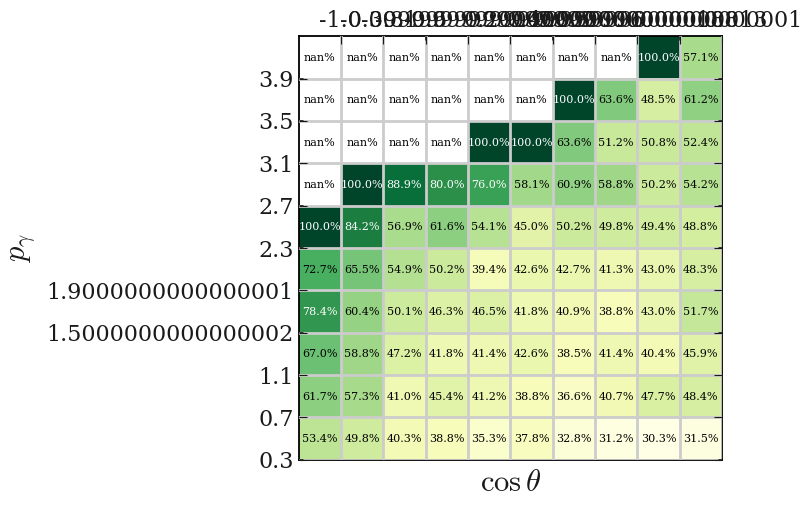

In [80]:
# z = h_data # generate random data
z = np.flip(h_random, axis=1)
nx, ny = z.shape
indx, indy = np.arange(nx), np.arange(ny)

# indx = indx[::-1]
indy = indy[::-1]
x, y = np.meshgrid(indx, indy)

fig, ax = plt.subplots()
ax.imshow(z.T, interpolation="nearest", cmap=cm.YlGn) # plot grid values

for xval, yval in zip(x.flatten(), y.flatten()):
    zval = z[xval, yval]
    t = "%.1f%%"%(zval * 100,) # format value with 1 decimal point
    c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(xval, yval, t, color=c, va='center', ha='center',size=8)

#xlabels = 'abcdefghij'
# xlabels = [-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9]
# ylabels = [0.25, 0.75,1.25, 1.75,2.25, 2.75,3.25, 3.75]
xlabels = xedge
ylabels = yedge

#ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
#ax.set_yticks(indy+0.5)

ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
ax.grid(ls='-', lw=2)

# the tick labels, if you want them centered need to be adjusted in 
# this special way.
# for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy), 
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy),                          
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    ind=ind+0.49
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

ax.xaxis.tick_top()

plt.ylabel("$p_\gamma$")
plt.xlabel(r"$\cos\theta$")

plt.show()

In [20]:

h_random.shape

(10, 5)

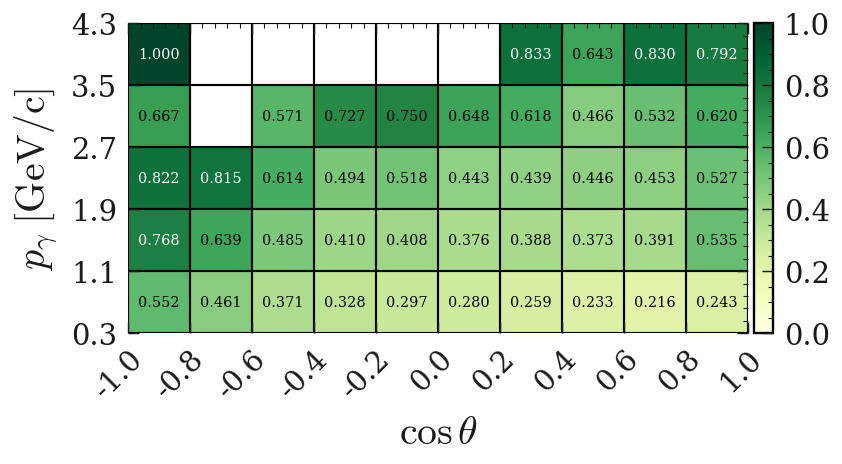

In [9]:
draw_2D_grid(h_random)

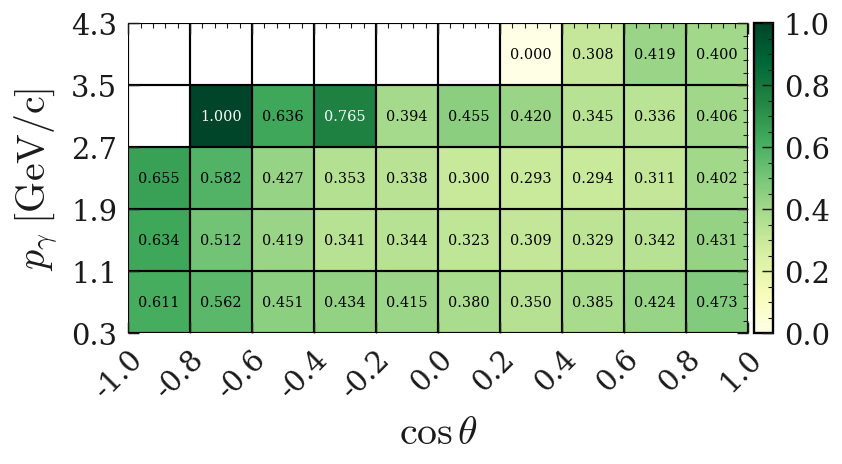

In [85]:
draw_2D_grid(h_random)

## pi0's daughter condition

In [14]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'

tree = 'antiKstar'

#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
#base_filter_pi0mother = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter_pi0mother = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC1 = get_pd(file=file, tree=tree,base_filter=base_filter_pi0mother,variables=variables)

x1=pd_antiKstarpi0_sigMC1['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC1['gamma_p']

In [15]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'

tree = 'antiKstar'

#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
base_filter_pi0mother = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111 && Pi0_Prob<0.9'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC2 = get_pd(file=file, tree=tree,base_filter=base_filter_pi0mother,variables=variables)

x2=pd_antiKstarpi0_sigMC2['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC2['gamma_p']


/tmp/ipykernel_30036/1840069264.py:7: RuntimeWarning: invalid value encountered in true_divide
  h_realmother = h2 / h1


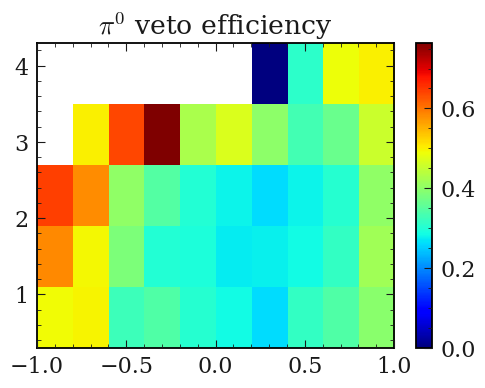

In [16]:
# yedge = np.linspace(0.3, 4.3, 11)
# xedge = np.linspace(-1, 1, 11)
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)
h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

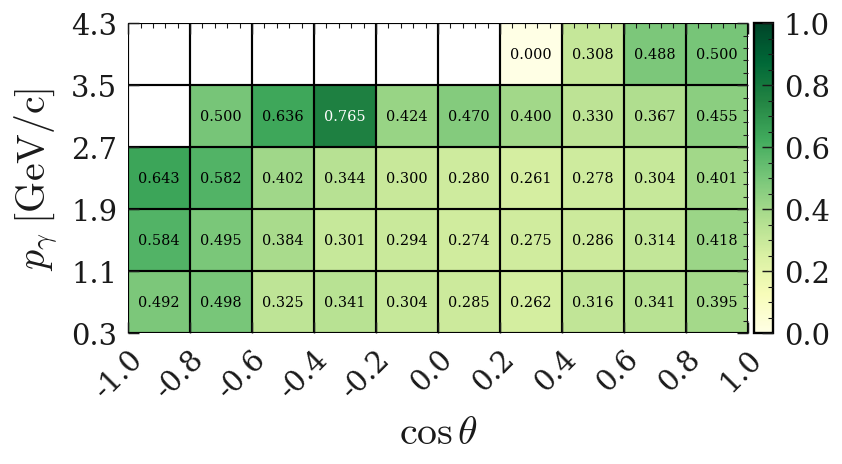

In [17]:
draw_2D_grid(h_realmother)

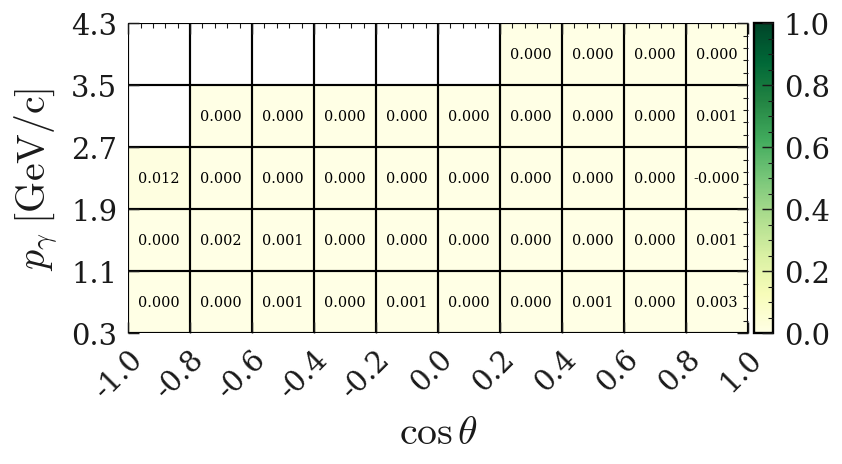

In [18]:
draw_2D_grid(h_random-h_realmother)

# kshort pi0

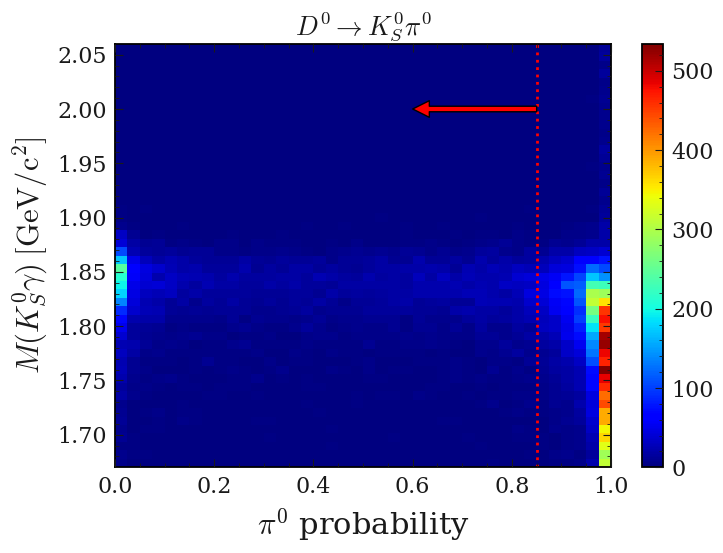

In [62]:
file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/kshort/v6_signal_extraction_signalMC_recon_mdst.root'


tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['Pi0_Prob']
y1=pd_antiKstarpi0_sigMC['D0_M']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M(K_S^0 \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.85, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.85,2.0), arrowprops=dict(facecolor='red'))

plt.colorbar()
plt.show()

## no MC matched

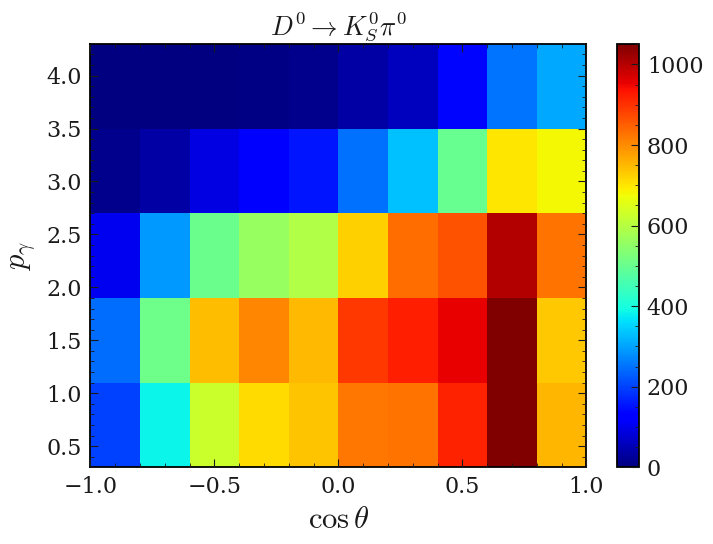

In [63]:
file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/kshort/v6_signal_extraction_signalMC_recon_mdst.root'

#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [64]:
pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

 111.0      24562
 0.0           39
 221.0         20
 11.0          16
-423.0         14
 22.0          13
 130.0          8
-433.0          8
-421.0          7
-211.0          7
 211.0          6
 223.0          6
-2212.0         6
 23.0           3
 311.0          2
 331.0          2
 321.0          2
 310.0          2
-20413.0        1
 113.0          1
-413.0          1
-213.0          1
-4122.0         1
-321.0          1
Name: gamma_genMotherPDG, dtype: int64

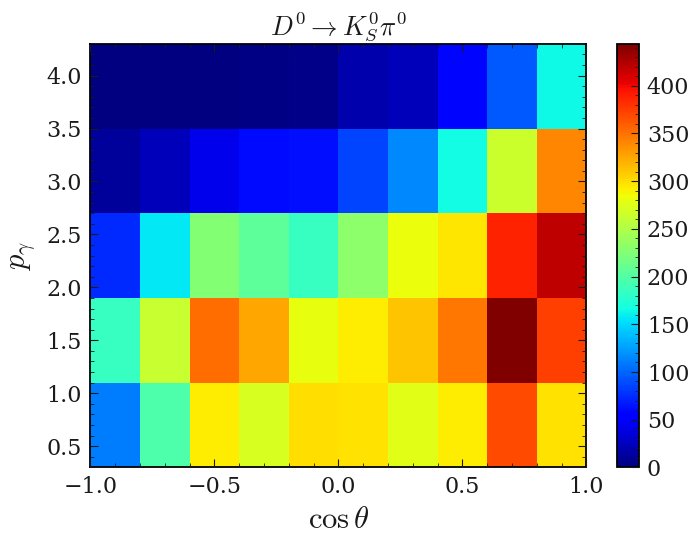

In [65]:
file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/kshort/v6_signal_extraction_signalMC_recon_mdst.root'

#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG']

pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [66]:
pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

 111.0     9865
 0.0         14
 11.0        10
 221.0        8
 22.0         6
-423.0        6
 130.0        4
-211.0        3
 223.0        3
 311.0        1
 23.0         1
-421.0        1
 331.0        1
-2212.0       1
 211.0        1
 310.0        1
Name: gamma_genMotherPDG, dtype: int64

/tmp/ipykernel_1436055/3328702066.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_kshort_random = h2 / h1


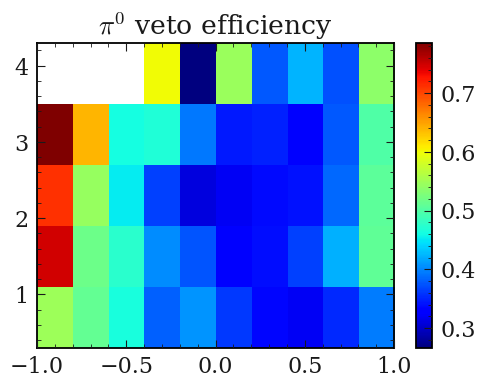

In [67]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_kshort_random = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_kshort_random.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

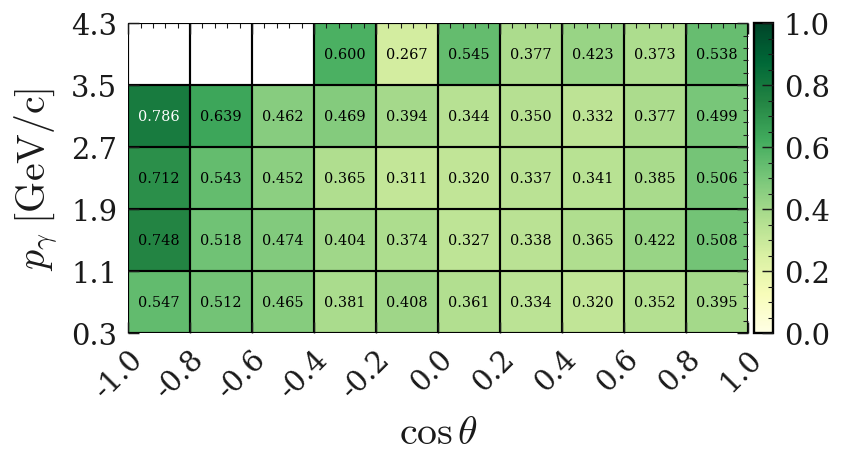

In [68]:
draw_2D_grid(h_kshort_random)

## pi0's daughter condition

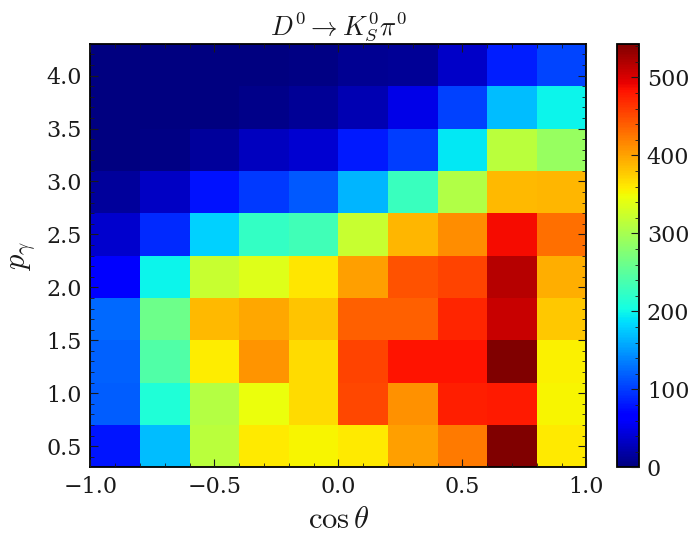

In [27]:
file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/kshort/v6_signal_extraction_signalMC_recon_mdst.root'

#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

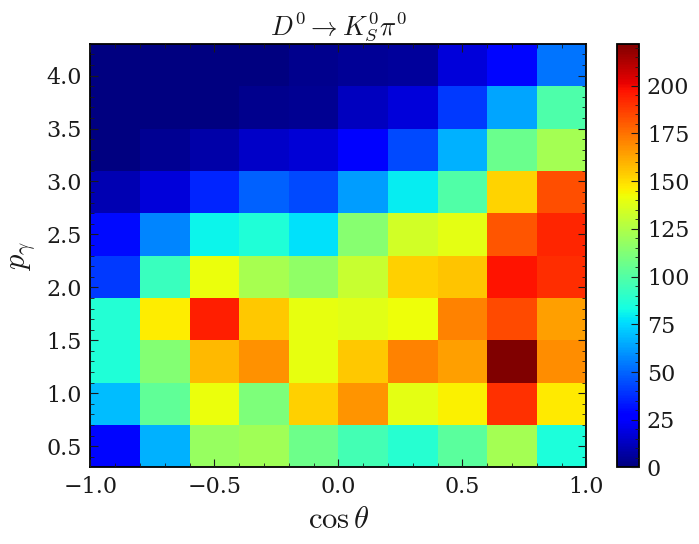

In [28]:
file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/kshort/v6_signal_extraction_signalMC_recon_mdst.root'

#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.85 && gamma_genMotherPDG==111'
#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_1436055/1908527542.py:9: RuntimeWarning: invalid value encountered in true_divide
  h_kshort_realmother = h2 / h1


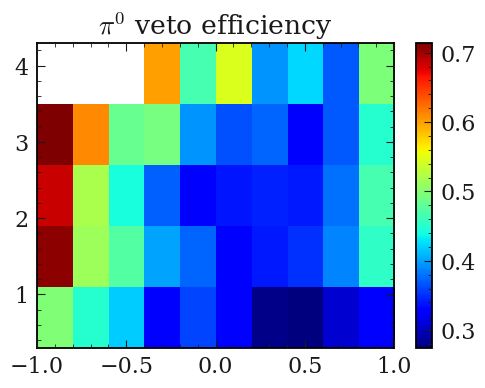

In [29]:
# yedge = np.linspace(0.3, 4.3, 11)
# xedge = np.linspace(-1, 1, 11)

yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_kshort_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_kshort_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

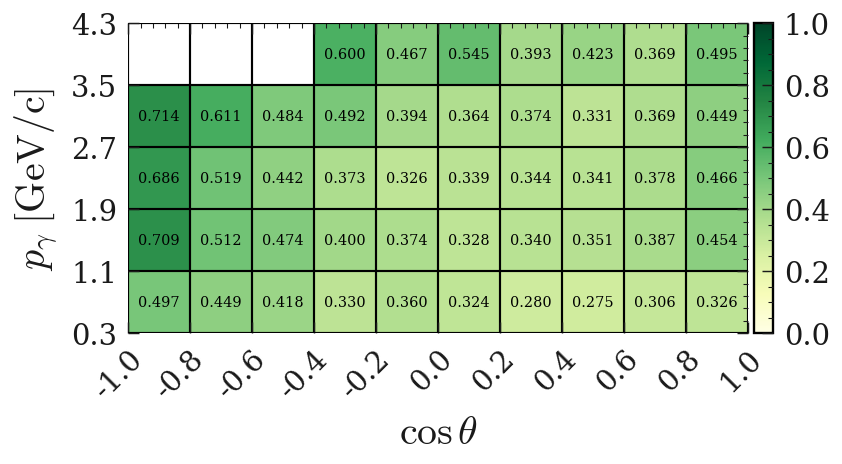

In [30]:
draw_2D_grid(h_kshort_realmother)

In [24]:
draw_2D_grid(h_kshort_random-h_kshort_realmother)

ValueError: operands could not be broadcast together with shapes (10,5) (10,10) 

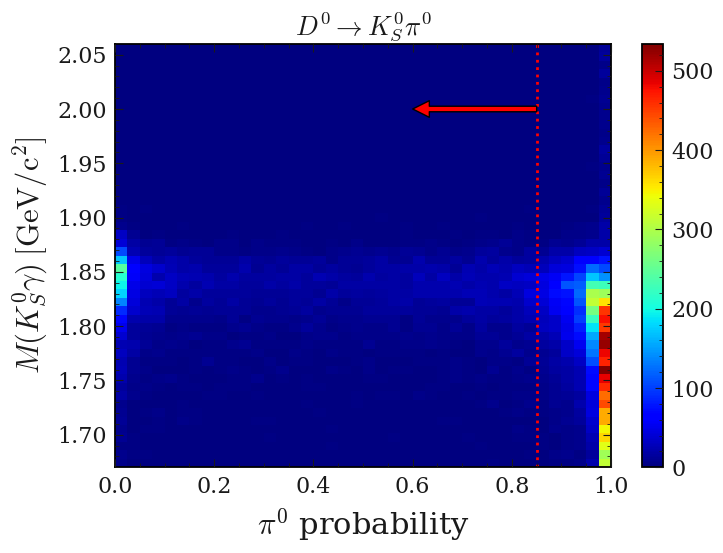

In [62]:
file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/kshort/v6_signal_extraction_signalMC_recon_mdst.root'


tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['Pi0_Prob']
y1=pd_antiKstarpi0_sigMC['D0_M']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M(K_S^0 \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.85, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.85,2.0), arrowprops=dict(facecolor='red'))

plt.colorbar()
plt.show()

## no MC matched (genericMC)

In [10]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext/'


#base_filter = ' D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8 && abs(Dstarp_Q-0.00593)<0.0006'
tree = 'kshort'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E']
var = 'D0_M'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && abs(Dstarp_Q-0.00593)<0.0006 '

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','Pi0_Prob','Eta_Prob']

In [11]:
generic_Kg_ccbar = base_file_loc + 'ccbar/recon_*.root'
generic_Kg_uubar = base_file_loc + 'uubar/recon_*.root'
generic_Kg_ddbar = base_file_loc + 'ddbar/recon_*.root'
generic_Kg_ssbar = base_file_loc + 'ssbar/recon_*.root'
generic_Kg_charged = base_file_loc + 'charged/recon_*.root'
generic_Kg_mixed = base_file_loc + 'mixed/recon_*.root'
generic_Kg_taupair = base_file_loc + 'taupair/recon_*.root'
#base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = base_filter
varaiables = variables
tree=tree

pd_generic_Kg_ccbar = get_pd(file=generic_Kg_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_generic_Kg_uubar = get_pd(file=generic_Kg_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_generic_Kg_ddbar = get_pd(file=generic_Kg_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_generic_Kg_ssbar = get_pd(file=generic_Kg_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_generic_Kg_charged = get_pd(file=generic_Kg_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_generic_Kg_mixed = get_pd(file=generic_Kg_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_generic_Kg_taupair = get_pd(file=generic_Kg_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [12]:
pd_merged_generic_Kg = pd.concat([pd_generic_Kg_ccbar, pd_generic_Kg_uubar, pd_generic_Kg_ddbar, pd_generic_Kg_ssbar, pd_generic_Kg_charged, pd_generic_Kg_mixed, pd_generic_Kg_taupair])


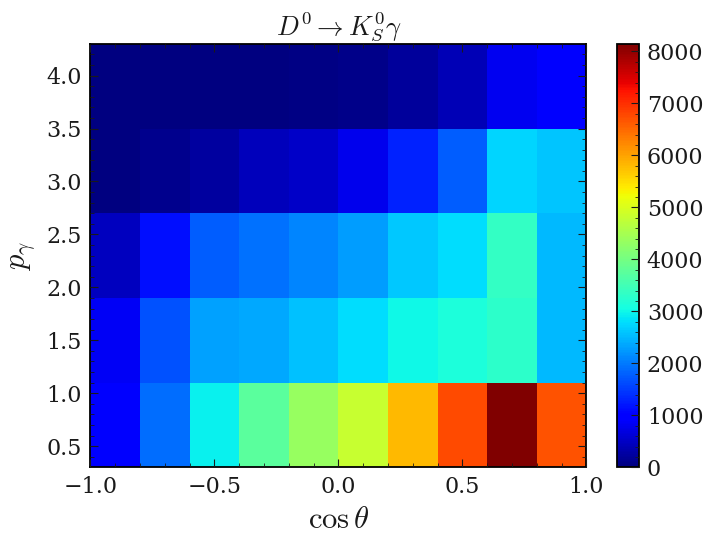

In [13]:
x1=pd_merged_generic_Kg['gamma_cosTheta']
y1=pd_merged_generic_Kg['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [51]:
pd_merged_generic_Kg['gamma_genMotherPDG'].value_counts()

 111.0      94007
 221.0       5036
 0.0         1238
 11.0         961
-423.0        370
            ...  
-3214.0         1
-2224.0         1
-20423.0        1
 20313.0        1
 24.0           1
Name: gamma_genMotherPDG, Length: 68, dtype: int64

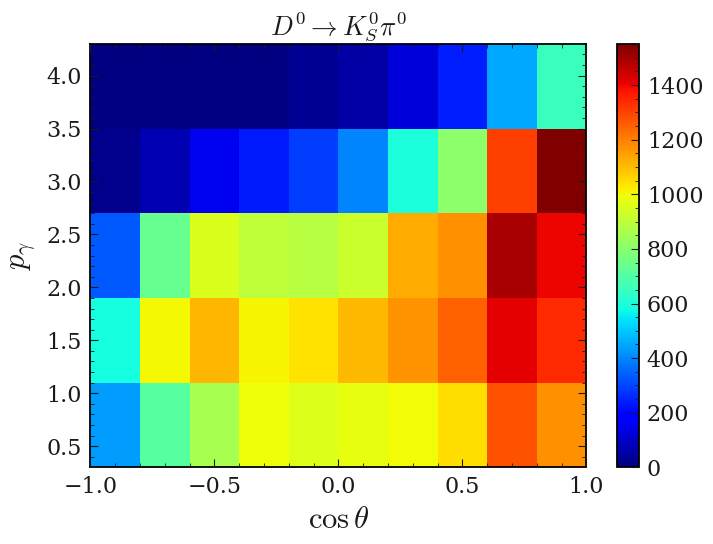

In [14]:


x2=pd_merged_generic_Kg.query('Pi0_Prob<0.9')['gamma_cosTheta']
y2=pd_merged_generic_Kg.query('Pi0_Prob<0.9')['gamma_p']



px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [53]:
pd_merged_generic_Kg.query('Pi0_Prob<0.8')['gamma_genMotherPDG'].value_counts()

 111.0        38464
 221.0         4408
 11.0           856
 0.0            541
 23.0           184
 223.0          160
-423.0          124
 421.0          112
 130.0           98
-433.0           85
-211.0           80
 22.0            61
 311.0           55
 331.0           52
 211.0           46
-2112.0          40
-2212.0          39
-421.0           36
 310.0           32
-311.0           31
 321.0           27
 113.0           24
-321.0           15
-411.0           14
 213.0           14
 511.0           11
-511.0            9
 313.0            8
-521.0            8
 423.0            8
-413.0            8
 521.0            7
 433.0            7
-213.0            7
 3122.0           7
 323.0            6
 333.0            5
-20433.0          4
-313.0            4
 411.0            4
-431.0            3
-15.0             3
 15.0             2
 443.0            2
-3122.0           2
 9000221.0        2
-425.0            1
 431.0            1
-1114.0           1
-3212.0           1


/tmp/ipykernel_7037/3328702066.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_kshort_random = h2 / h1


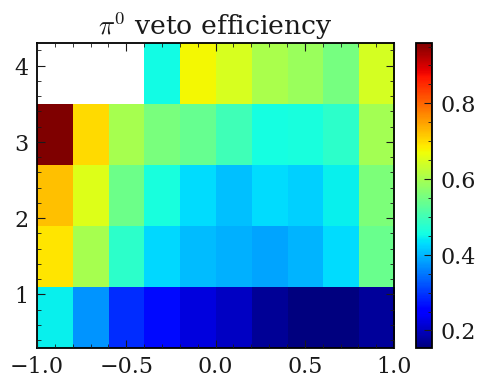

In [16]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_kshort_random = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_kshort_random.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

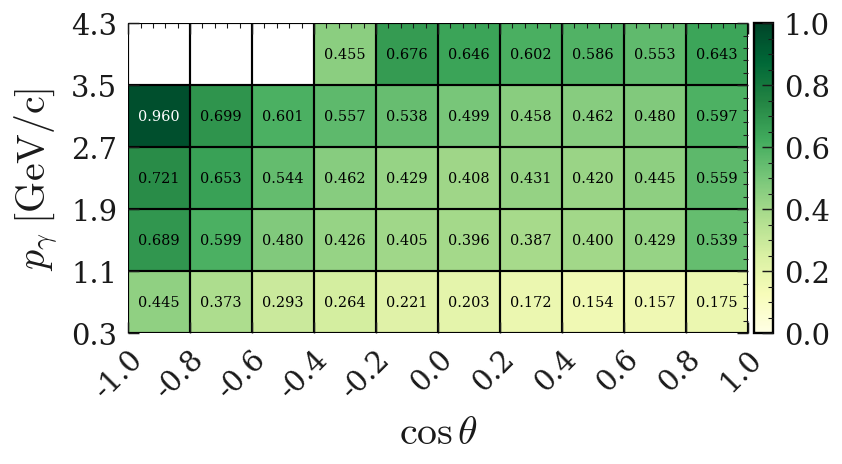

In [17]:
draw_2D_grid(h_kshort_random)

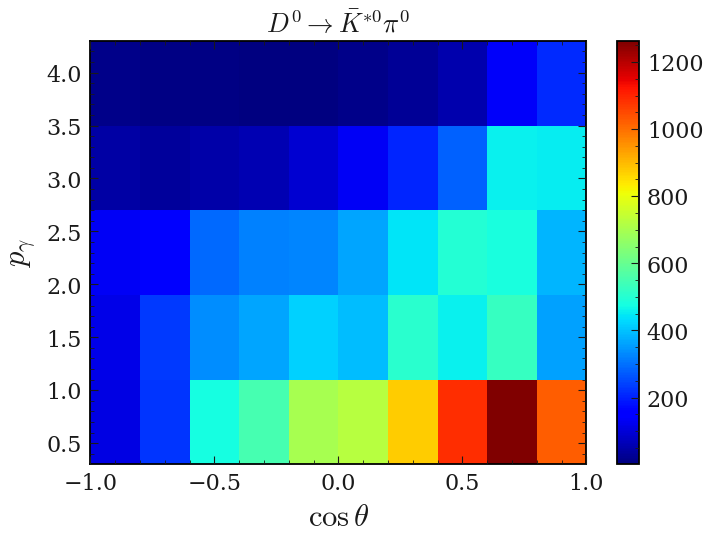

In [26]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v11_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v14_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v16_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'

tree = 'kshort'

base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

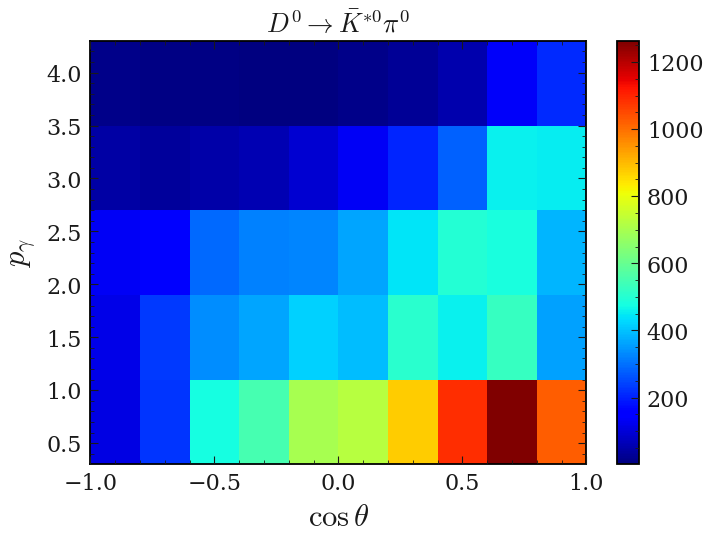

In [27]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_correct_sig_ext_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v9mask_signal_extraction_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v11_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v14_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v15_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v16_signal_extraction_signalMC_recon_mdst.root'
file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'

tree = 'kshort'

base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.90'
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [9]:
pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

 111.0     7691
 0.0          5
 221.0        4
 22.0         3
 311.0        2
 23.0         2
 223.0        2
-423.0        1
 213.0        1
 211.0        1
 11.0         1
-2212.0       1
-2112.0       1
-211.0        1
Name: gamma_genMotherPDG, dtype: int64

In [10]:
pd_antiKstarpi0_sigMC['Pi0_soft_genMotherPDG'].value_counts()

 0.0       4201
 111.0     3037
-321.0      101
 211.0       68
-13.0        54
-211.0       51
 22.0        34
-313.0       30
-2212.0      19
 11.0        16
 130.0       14
 321.0       14
 221.0       11
 13.0         7
 113.0        7
-2112.0       7
 23.0         6
 413.0        6
 310.0        5
-423.0        4
-421.0        4
 223.0        4
-213.0        3
 311.0        3
-433.0        2
 313.0        2
 213.0        1
-431.0        1
 3122.0       1
 331.0        1
 323.0        1
-411.0        1
Name: Pi0_soft_genMotherPDG, dtype: int64

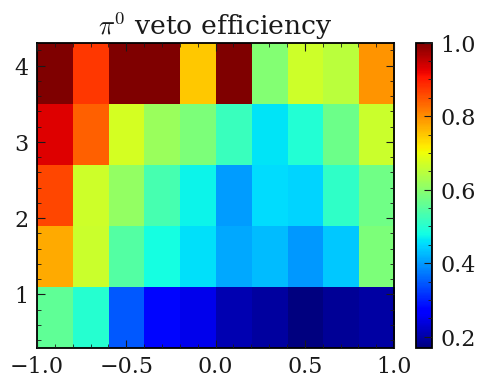

In [28]:
# xedge = [-1, -0.8, -0.6,-0.4, -0.2 , 0 , 0.2 , 0.4 , 0.6, 0.8, 1]
# yedge = [0,0.5, 1,1.5, 2,2.5, 3,3.5, 4]


yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

In [29]:
# xedge = [-1, -0.8, -0.6,-0.4, -0.2 , 0 , 0.2 , 0.4 , 0.6, 0.8, 1]
# yedge = [0.,0.5, 1,1.5, 2,2.5, 3,3.5, 4]
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)
h1_data, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2_data, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
# h_realmother_pi0= h2_data / h1_data


h_kshort_grid= h2_data / h1_data



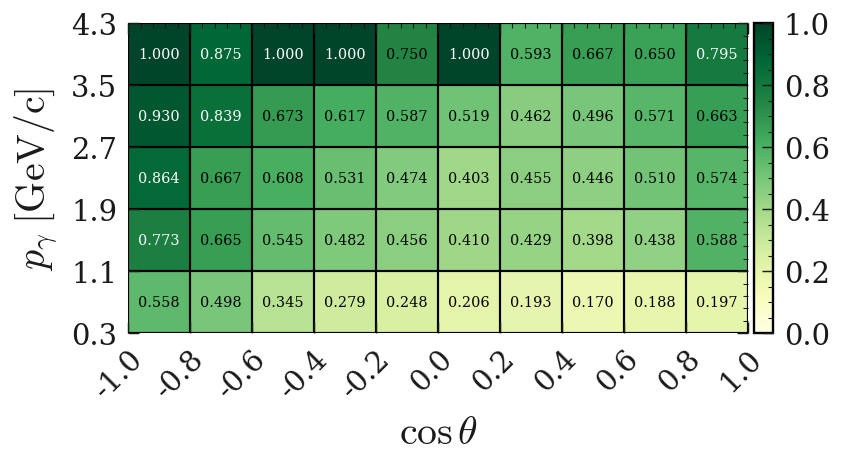

In [30]:
draw_2D_grid(h_kshort_grid)

# phi gamma(signal MC)

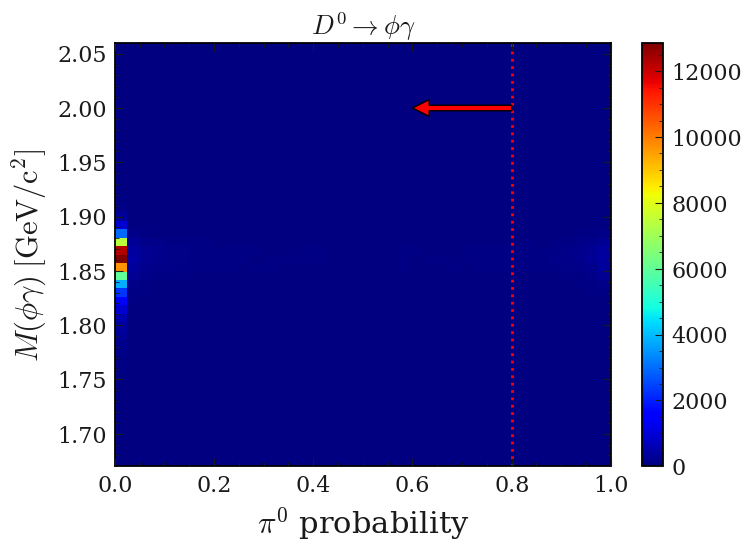

In [58]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_correct_weight_signalMC_recon_mdst_phi.root'
file = '/media/jykim/T7/storage/01_recon/phi/v6_sig_ext_signalMC_recon_mdst_phi.root'
file = '/media/jykim/T7/storage/01_recon/phi/v12_sig_ext_signalMC_recon_mdst_phi.root'

tree = 'phi'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
y1=pd_antiKstarpi0_sigMC['D0_M']
x1=pd_antiKstarpi0_sigMC['Pi0_Prob']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \phi \gamma$"

plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M(\phi \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.8, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.8,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## no MC matched

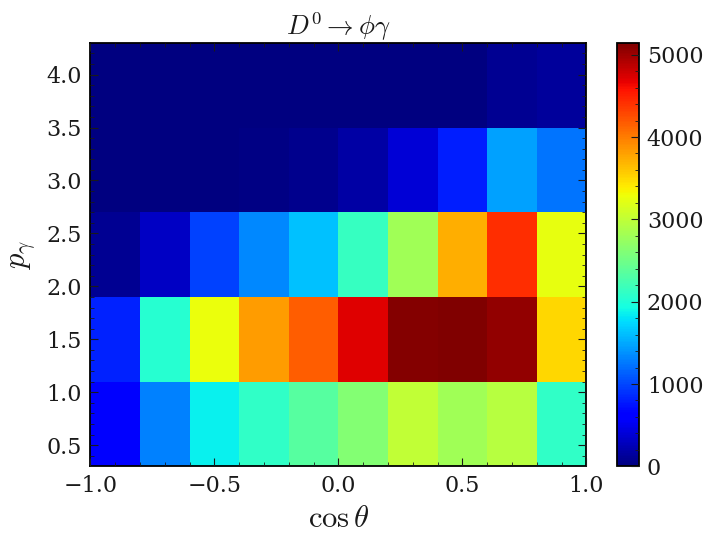

In [59]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/phi/v12_sig_ext_signalMC_recon_mdst_phi.root'

tree = 'phi'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','Pi0_soft_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \phi \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [60]:
n = 5

pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts().index.tolist()

[421.0, 111.0, 22.0, 11.0, 221.0, 0.0, 223.0, 23.0, 311.0, 130.0]

In [61]:
n = 5

pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

421.0    84151
111.0      141
22.0        67
11.0         9
221.0        8
0.0          5
223.0        2
23.0         2
311.0        1
130.0        1
Name: gamma_genMotherPDG, dtype: int64

In [62]:
n = 5

pd_antiKstarpi0_sigMC['Pi0_soft_genMotherPDG'].value_counts()

 111.0      45587
 0.0        13297
 321.0       4293
-321.0       3768
-211.0       2549
            ...  
-10421.0        1
-10433.0        1
-20423.0        1
-10413.0        1
 2224.0         1
Name: Pi0_soft_genMotherPDG, Length: 80, dtype: int64

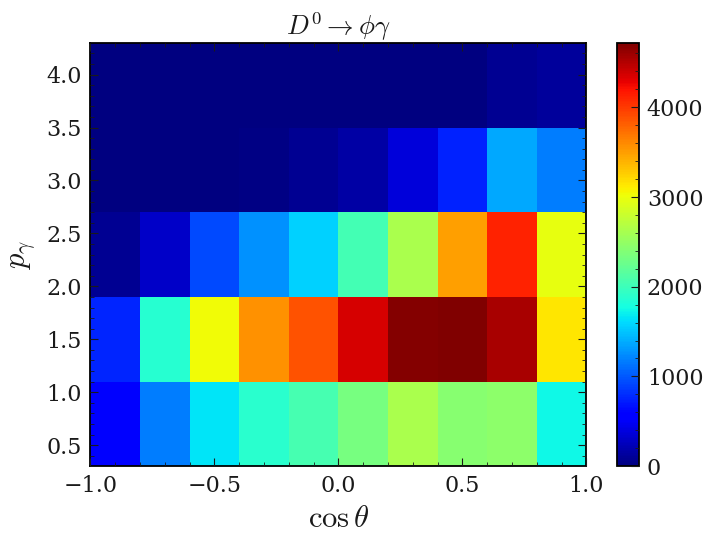

In [63]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_correct_weight_signalMC_recon_mdst_phi.root'
file = '/media/jykim/T7/storage/01_recon/phi/v12_sig_ext_signalMC_recon_mdst_phi.root'

tree = 'phi'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && Pi0_Prob<0.8'

variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \phi \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

In [64]:
n = 5

pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts().index.tolist()

[421.0, 22.0, 111.0, 11.0, 221.0, 0.0, 223.0, 311.0, 23.0]

In [65]:
n = 5

pd_antiKstarpi0_sigMC['gamma_genMotherPDG'].value_counts()

421.0    76775
22.0        54
111.0       38
11.0         7
221.0        6
0.0          5
223.0        1
311.0        1
23.0         1
Name: gamma_genMotherPDG, dtype: int64

/tmp/ipykernel_16172/3953026218.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_phig_random = h2 / h1


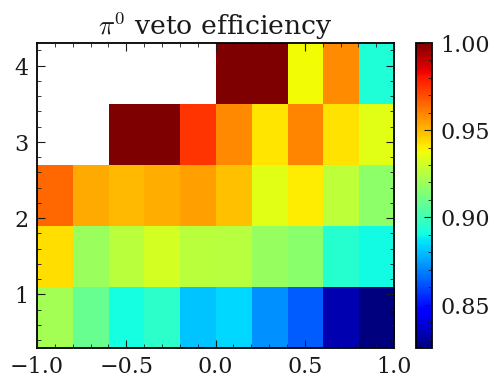

In [66]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_phig_random = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_phig_random.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

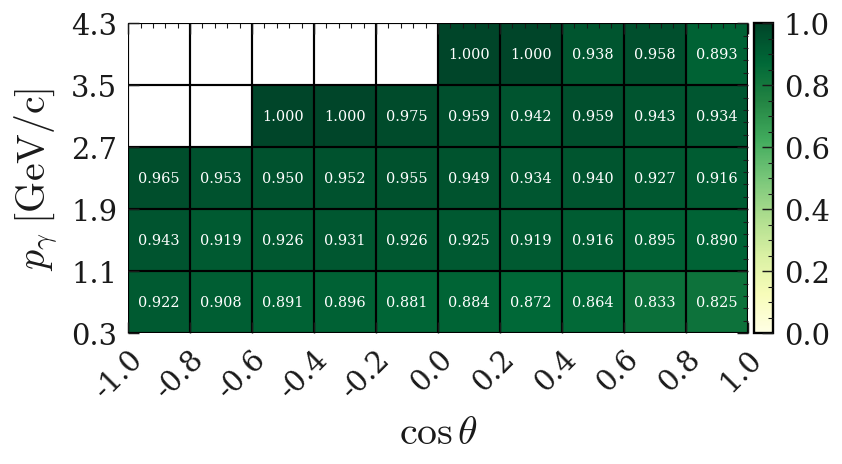

In [67]:
draw_2D_grid(h_phig_random)

## D0's daughter condition

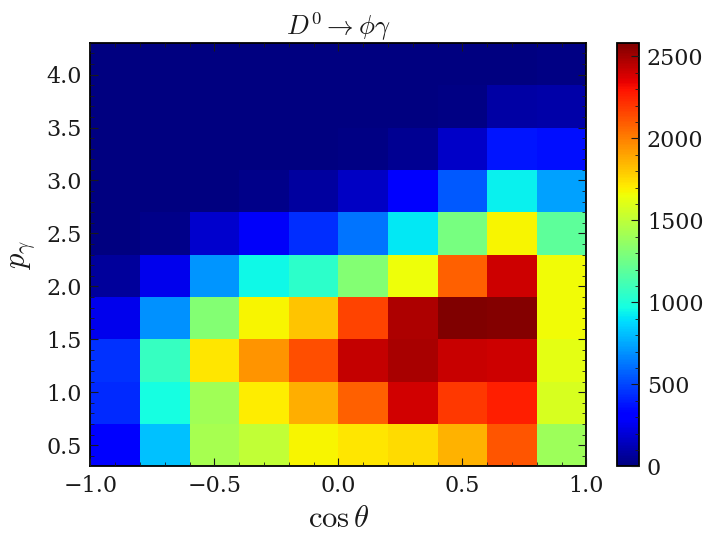

In [94]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'phi'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==421 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \phi \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

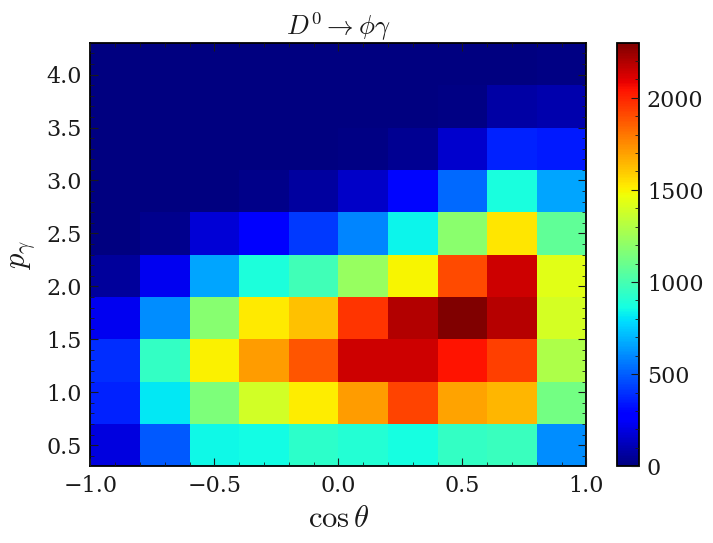

In [95]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'phi'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==421 && Pi0_Prob<0.8 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \phi \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_300318/1753210503.py:5: RuntimeWarning: invalid value encountered in true_divide
  h_phig_realmother = h2 / h1


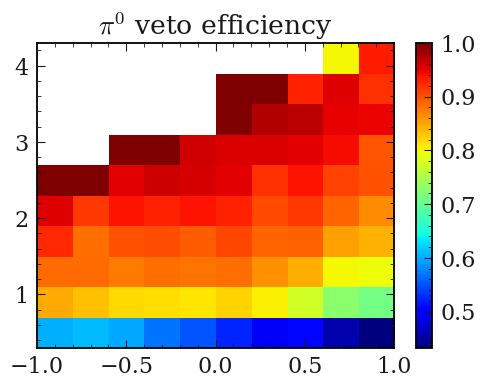

In [96]:
yedge = np.linspace(0.3, 4.3, 11)
xedge = np.linspace(-1, 1, 11)
h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_phig_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_phig_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

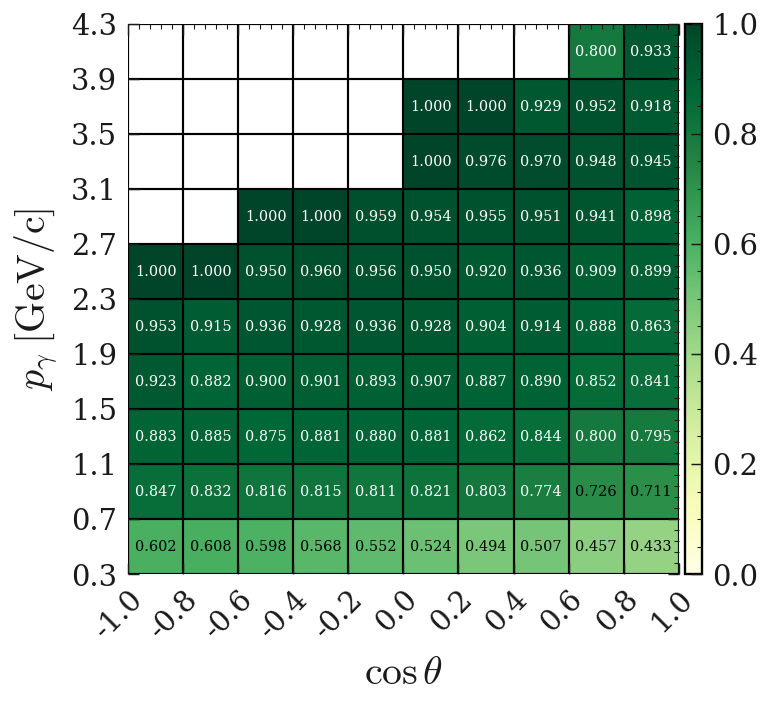

In [97]:
draw_2D_grid(h_phig_realmother)

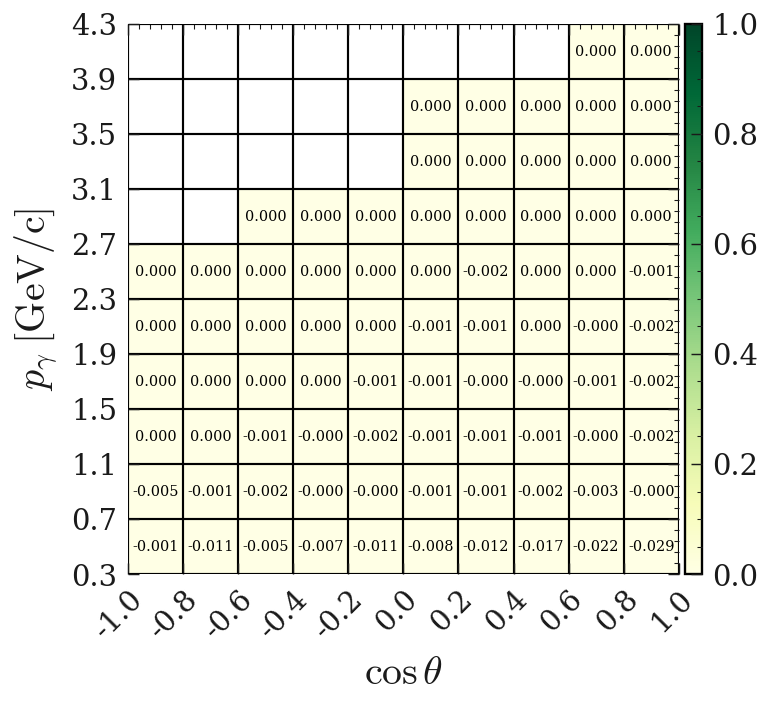

In [28]:
draw_2D_grid(h_phig_random-h_phig_realmother)

## Not D0's daughter condition

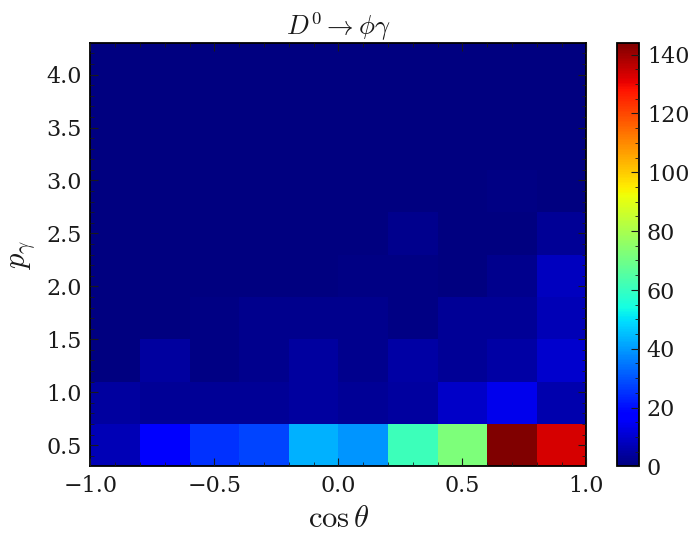

In [30]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'phi'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG!=421 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \phi \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

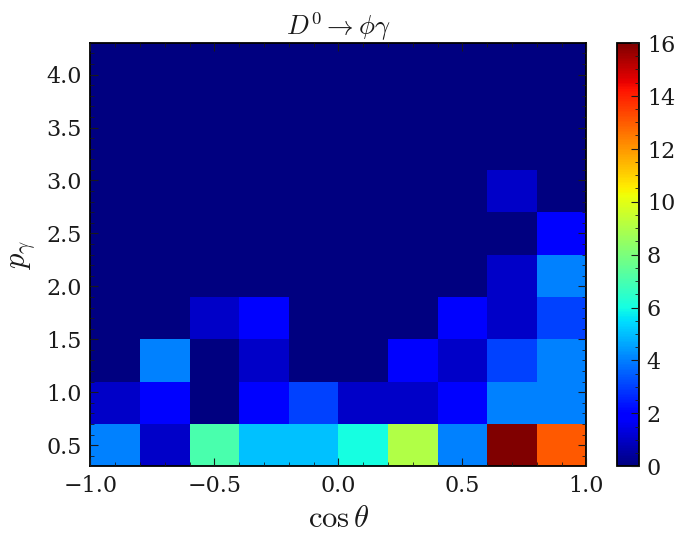

In [31]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'phi'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG!=421 && Pi0_Prob<0.8 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \phi \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_300318/1753210503.py:5: RuntimeWarning: invalid value encountered in true_divide
  h_phig_realmother = h2 / h1


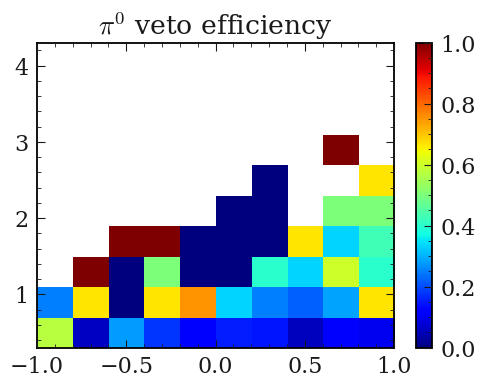

In [32]:
yedge = np.linspace(0.3, 4.3, 11)
xedge = np.linspace(-1, 1, 11)
h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_phig_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_phig_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

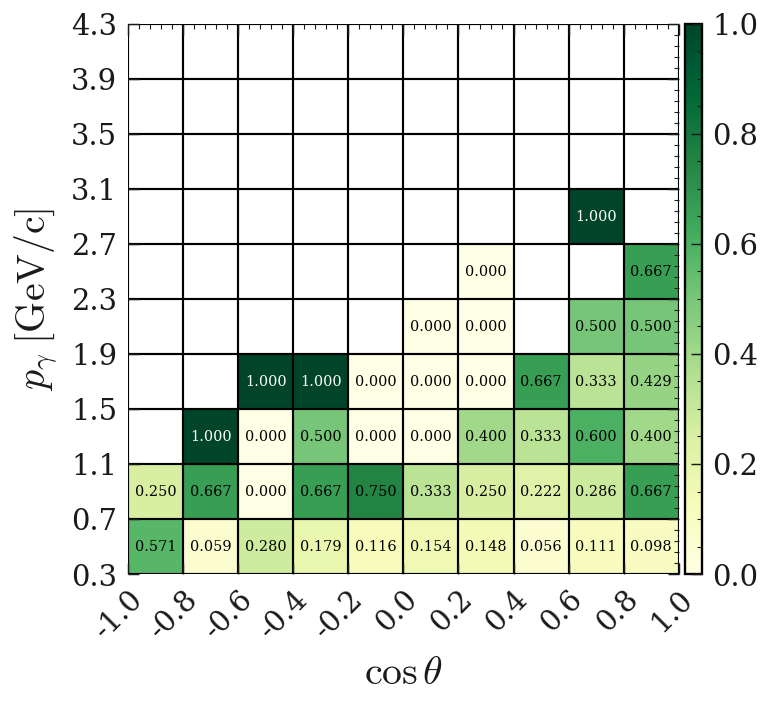

In [33]:
draw_2D_grid(h_phig_realmother)

# anti-K* gamma(signal MC)

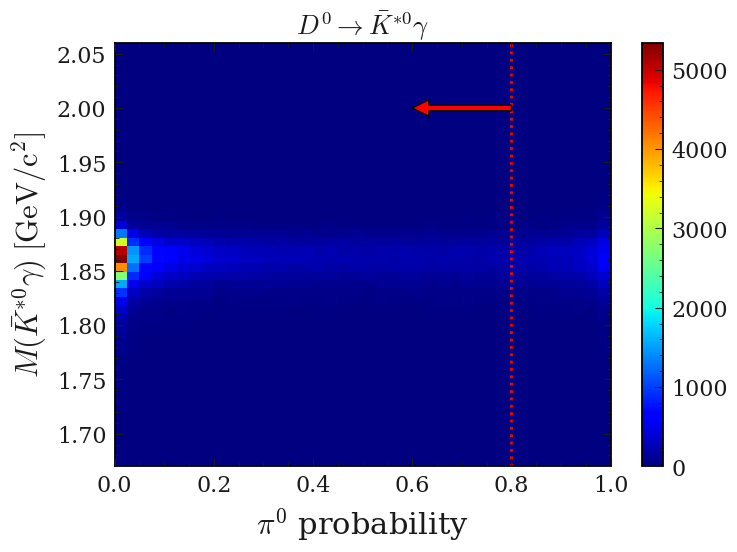

In [4]:
file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_correct_weight_signalMC_recon_mdst_antiKstar.root'
file = '/media/jykim/T7/storage/01_recon/antiKstar/v6_sig_ext_signalMC_recon_mdst_antiKstar.root'


#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
y1=pd_antiKstarpi0_sigMC['D0_M']
x1=pd_antiKstarpi0_sigMC['Pi0_Prob']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$"

plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M( \bar{K}^{*0} \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.8, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.8,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## no MC matched

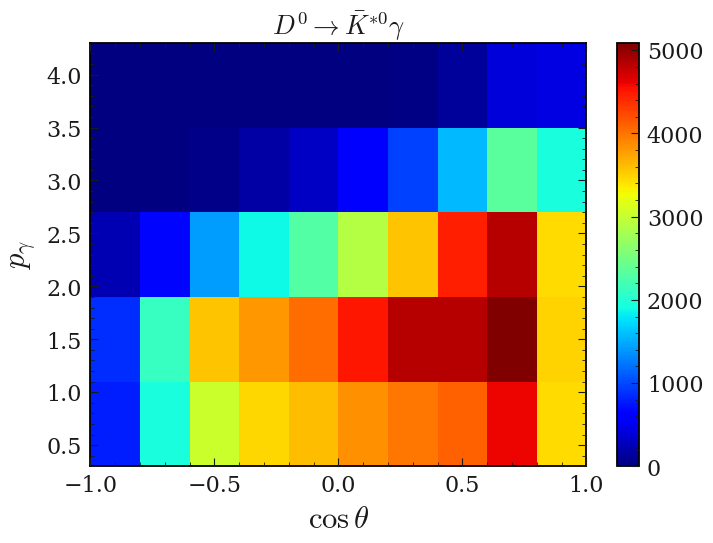

In [10]:
file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
#file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_correct_weight_signalMC_recon_mdst_antiKstar.root'

#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_correct_weight_signalMC_recon_mdst_antiKstar.root'
file = '/media/jykim/T7/storage/01_recon/antiKstar/v6_sig_ext_signalMC_recon_mdst_antiKstar.root'

tree = 'antiKstar'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

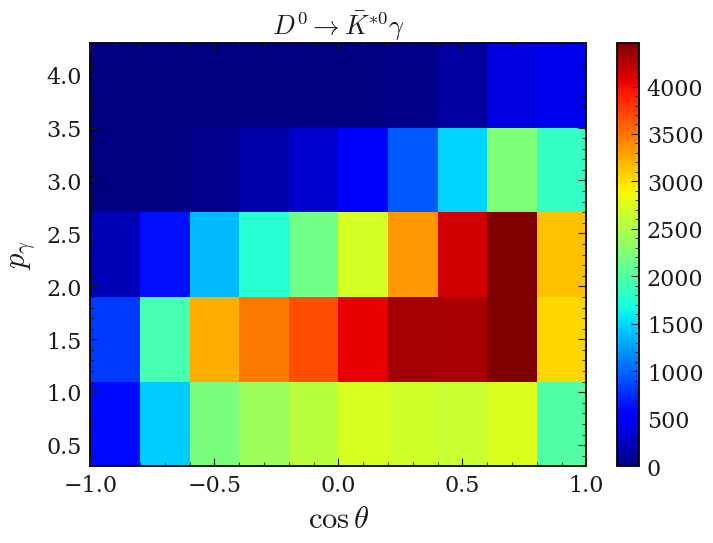

In [11]:
file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
#file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_correct_weight_signalMC_recon_mdst_antiKstar.root'

#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_correct_weight_signalMC_recon_mdst_antiKstar.root'
file = '/media/jykim/T7/storage/01_recon/antiKstar/v6_sig_ext_signalMC_recon_mdst_antiKstar.root'

tree = 'antiKstar'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_1432264/3886913606.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_Kg_random = h2 / h1


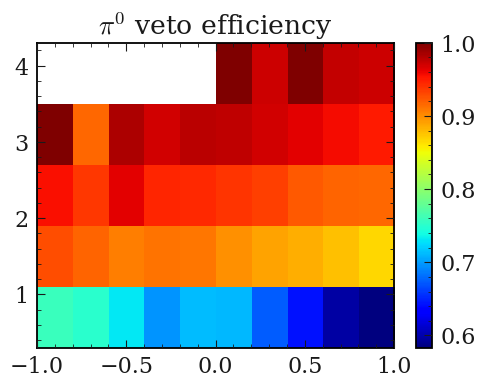

In [12]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_Kg_random = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_Kg_random.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

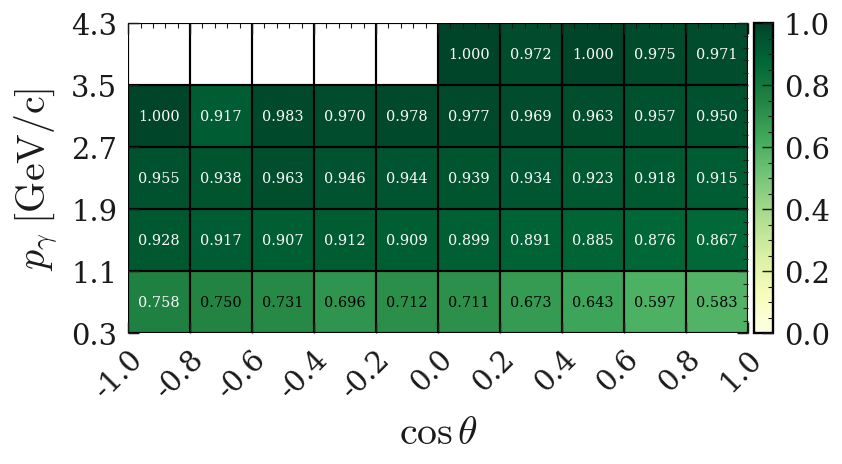

In [13]:
draw_2D_grid(h_Kg_random)

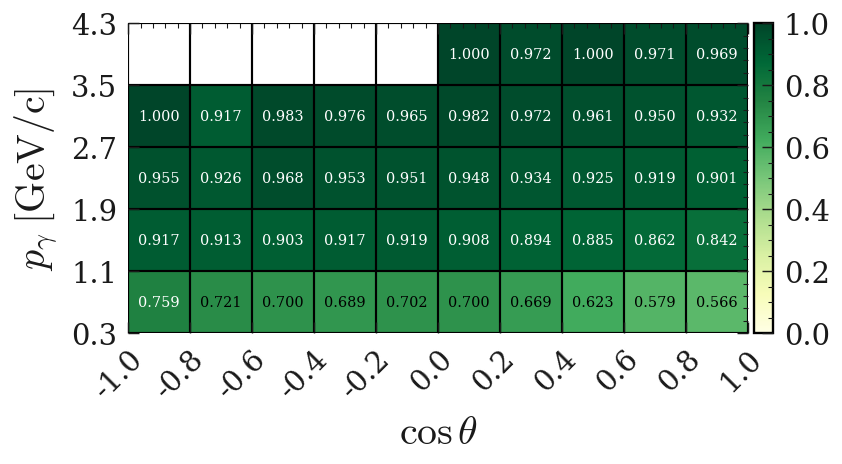

In [11]:
draw_2D_grid(h_Kg_random)

## D0's daughter condition

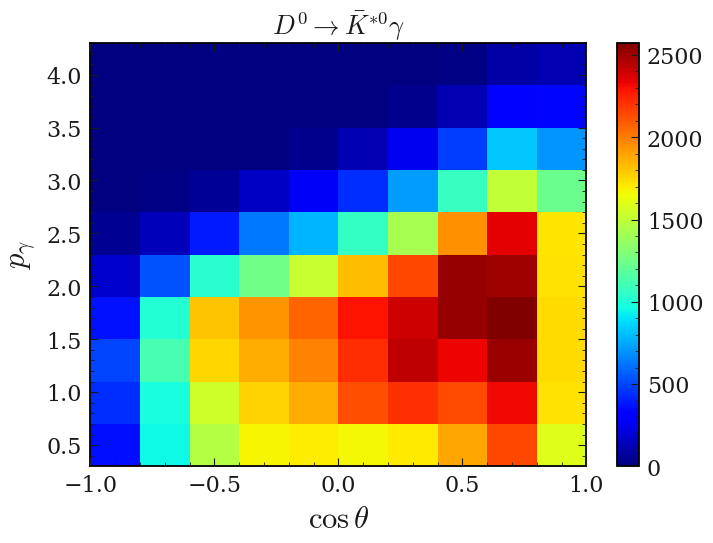

In [99]:
file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'antiKstar'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==421 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

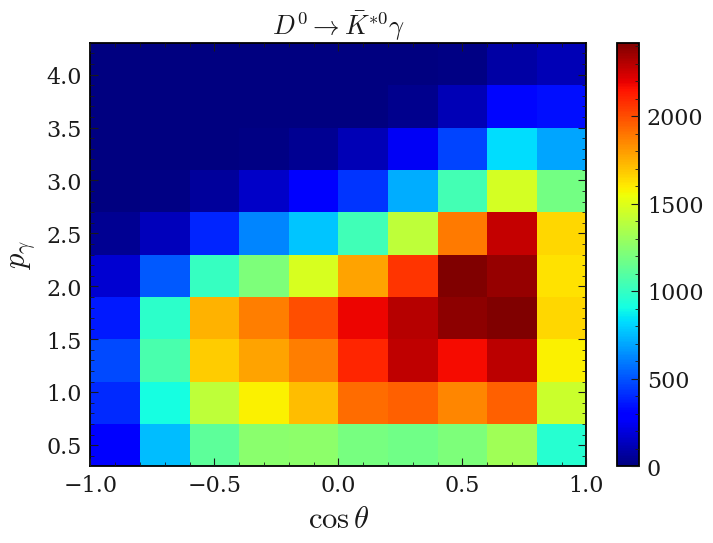

In [100]:
file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'antiKstar'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==421 && Pi0_Prob<0.9 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_8038/3964756075.py:5: RuntimeWarning: invalid value encountered in true_divide
  h_Kg_realmother = h2 / h1


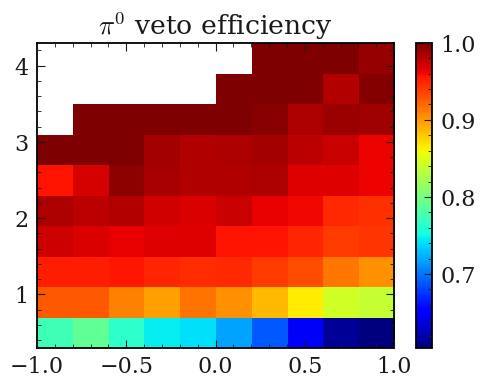

In [102]:
yedge = np.linspace(0.3, 4.3, 11)
xedge = np.linspace(-1, 1, 11)
h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_Kg_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_Kg_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

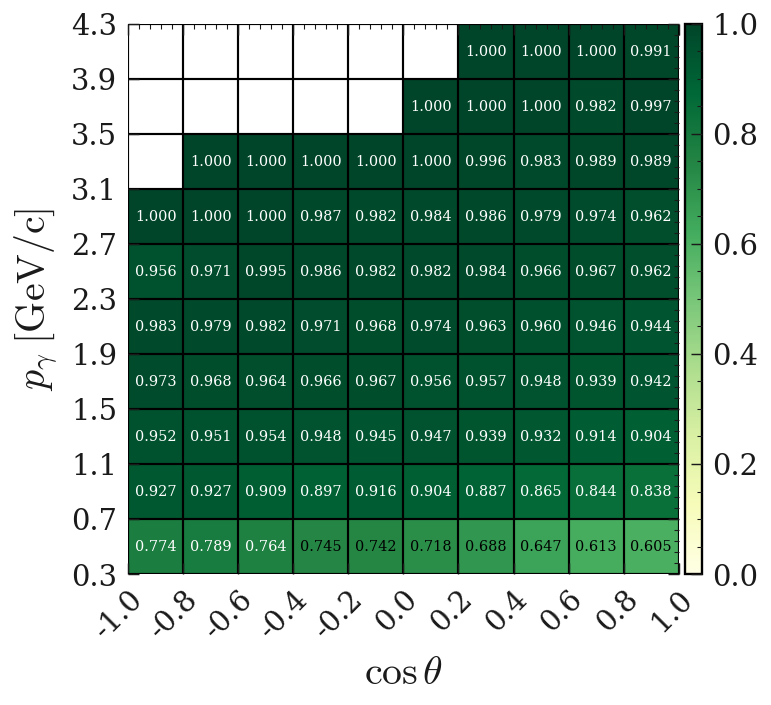

In [103]:
draw_2D_grid(h_Kg_realmother)

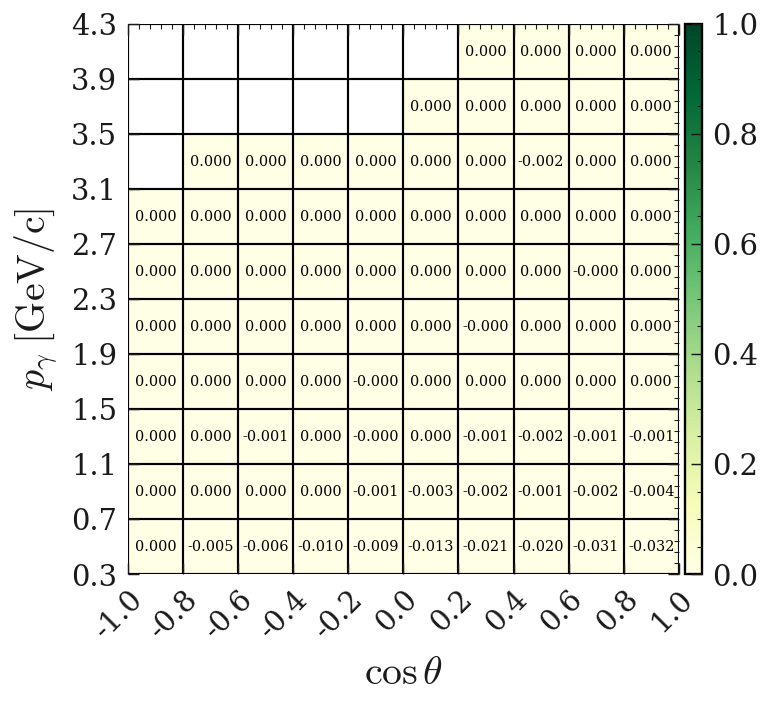

In [97]:
draw_2D_grid(h_Kg_random-h_Kg_realmother)

# rho0 gamma(signal MC)

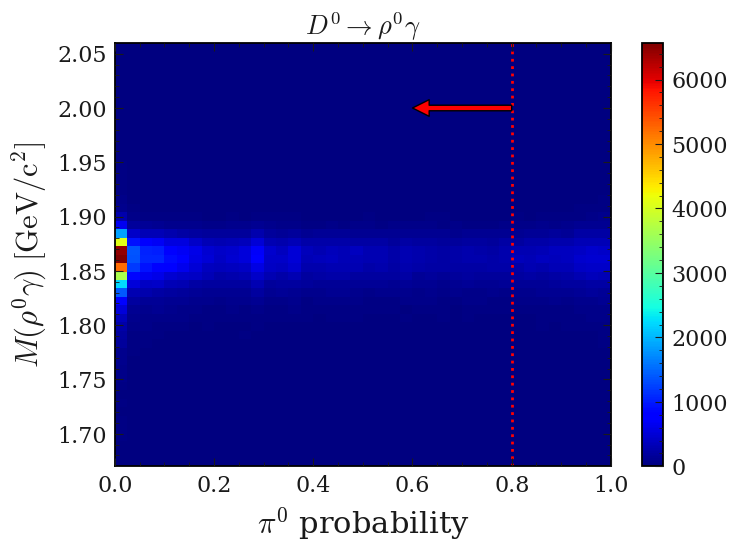

In [82]:
file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'rho'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
y1=pd_antiKstarpi0_sigMC['D0_M']
x1=pd_antiKstarpi0_sigMC['Pi0_Prob']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \rho^0 \gamma$"

plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M( \rho^0 \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.8, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.8,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## no MC matched

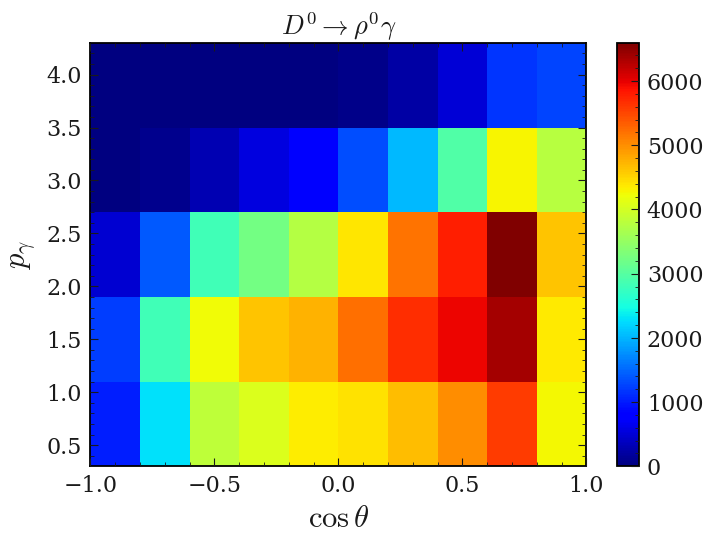

In [83]:
file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'rho'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \rho^0 \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

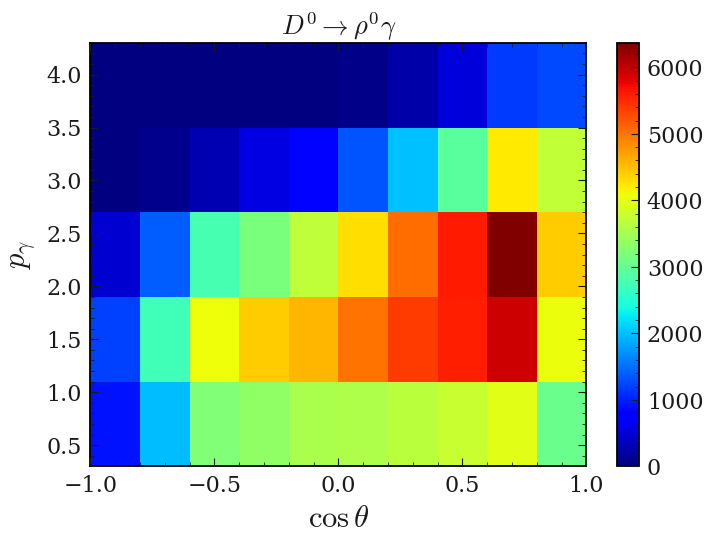

In [84]:
file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'rho'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \rho^0 \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_1256365/752256198.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_rhog_random = h2 / h1


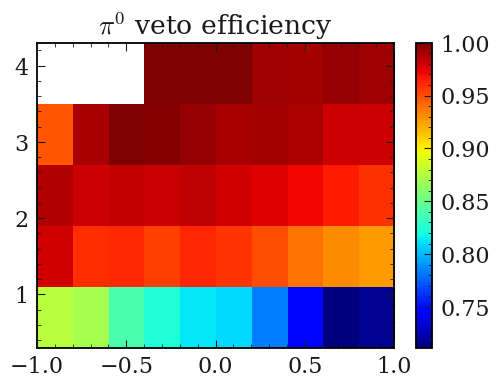

In [85]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_rhog_random = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_rhog_random.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

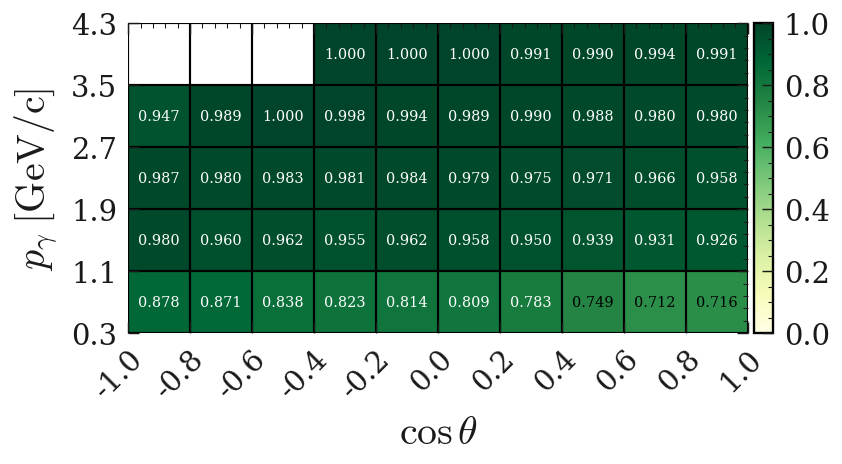

In [86]:
draw_2D_grid(h_rhog_random)

## D0's daughter condition

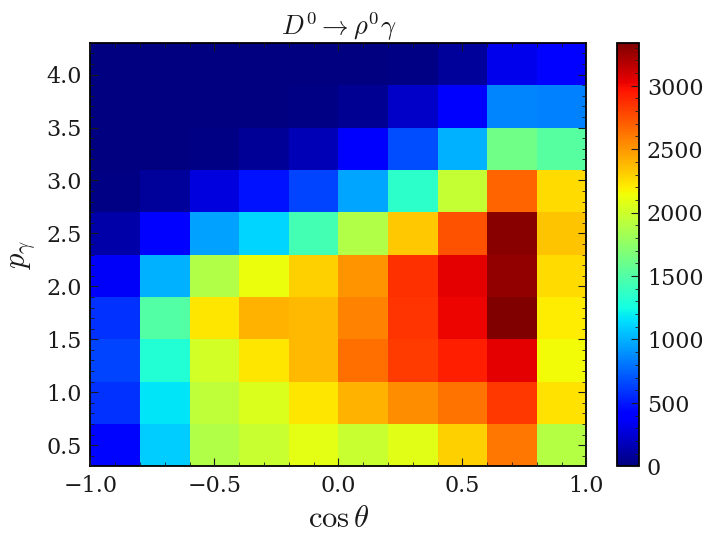

In [113]:
file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'rho'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  && gamma_genMotherPDG==421'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \rho^0 \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

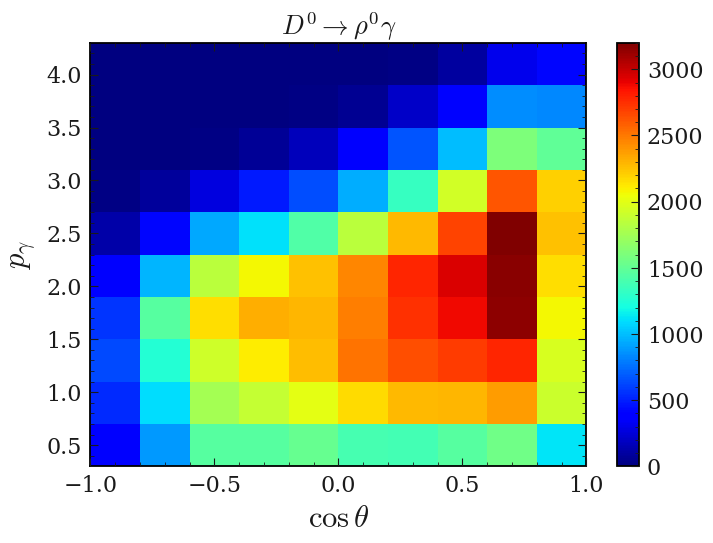

In [114]:
file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'rho'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  && gamma_genMotherPDG==421 && Pi0_Prob<0.9'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \rho^0 \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_8038/1403731140.py:5: RuntimeWarning: invalid value encountered in true_divide
  h_rhog_realmother = h2 / h1


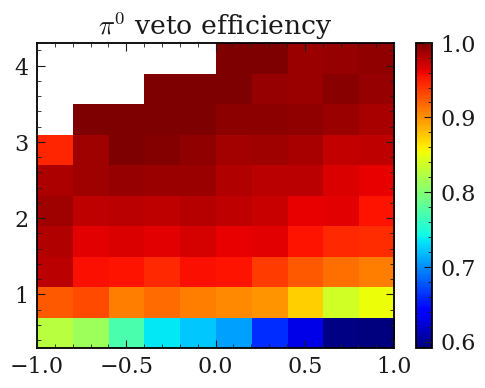

In [116]:
yedge = np.linspace(0.3, 4.3, 11)
xedge = np.linspace(-1, 1, 11)
h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_rhog_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_Kg_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

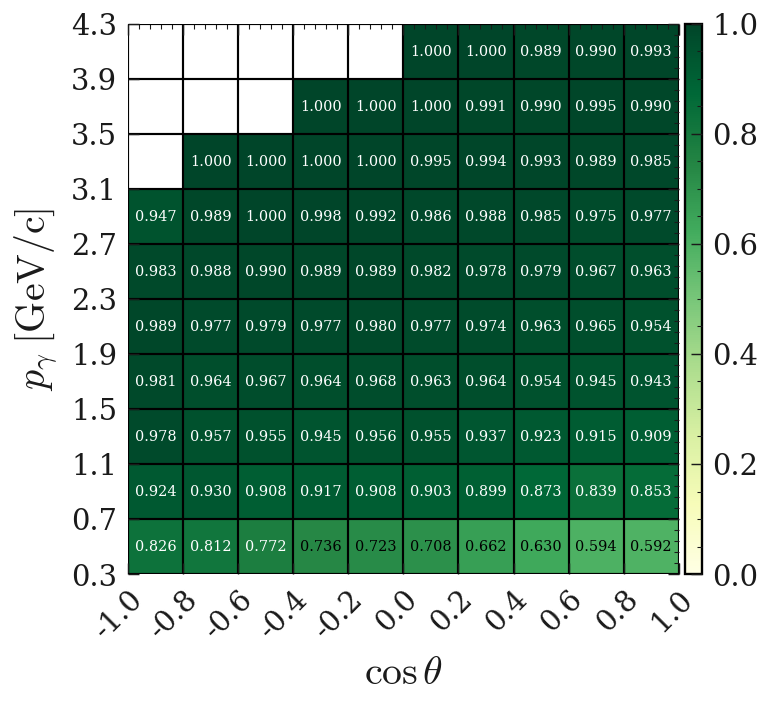

In [117]:
draw_2D_grid(h_rhog_realmother)

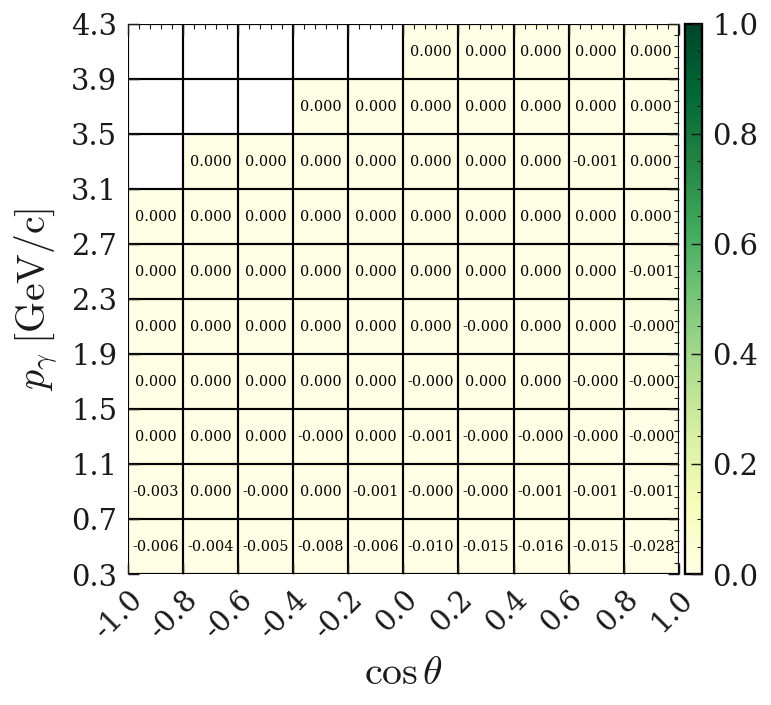

In [118]:
draw_2D_grid(h_rhog_random-h_rhog_realmother)

# omega gamma(signal MC)

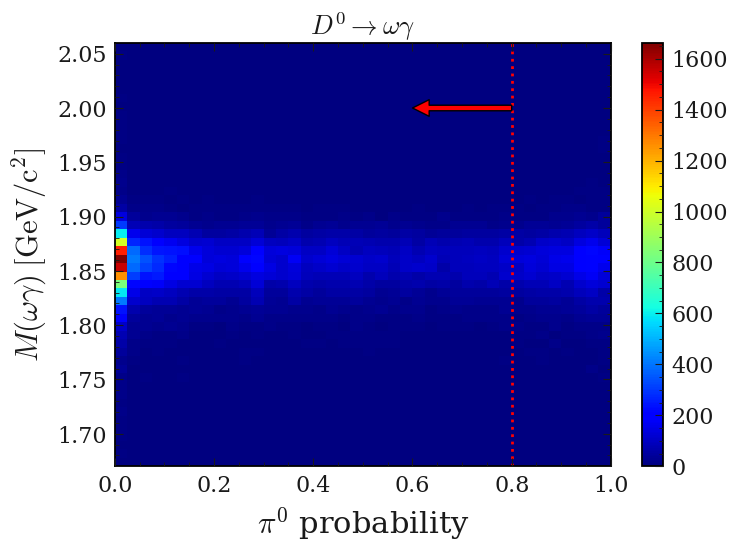

In [87]:
file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'omega'

base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter_pi0mother = 'antiKstargamma_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
y1=pd_antiKstarpi0_sigMC['D0_M']
x1=pd_antiKstarpi0_sigMC['Pi0_Prob']


px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(1.67, 2.06, 51)
xbins = np.linspace(0, 1, 41)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
plot_title=r"$D^0 \rightarrow \omega \gamma$"
plt.title(plot_title)
ax = plt.gca()
ylabel = r"$M(\omega \gamma) \; [\mathrm{GeV/c^2}]$"
xlabel = r"$\pi^0$ probability"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.8, color = 'r',ls=':', lw=2)
plt.annotate('', xy=(0.6,2.0),xytext=(0.8,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## no MC matched

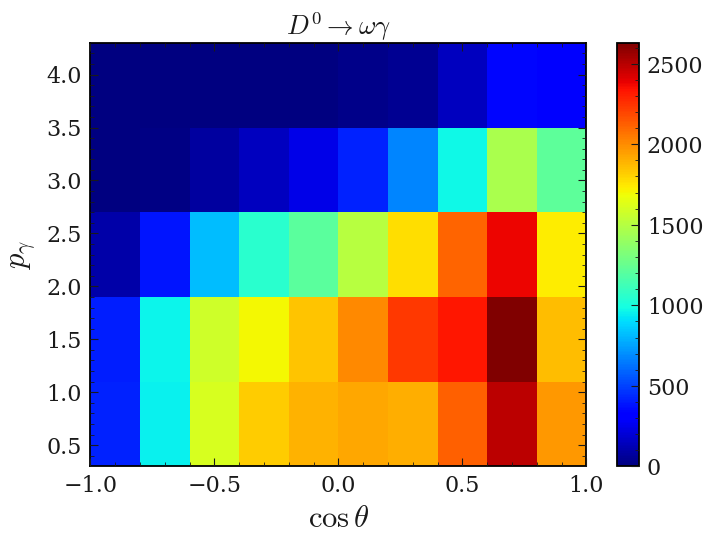

In [88]:
file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'omega'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \omega \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

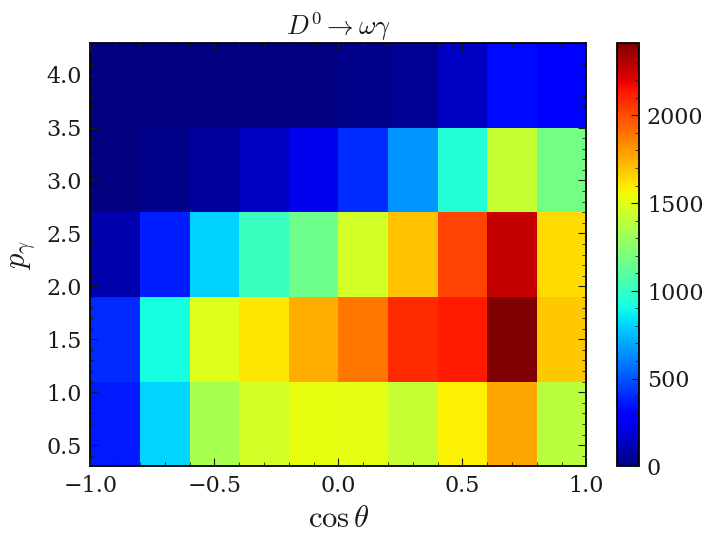

In [89]:
file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'omega'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 6)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \omega \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_1256365/1522451558.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_omegag_random = h2 / h1


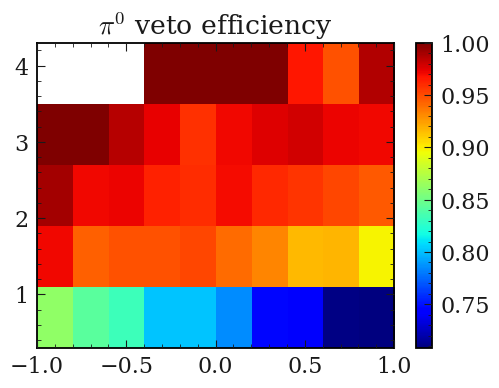

In [90]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_omegag_random = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_omegag_random.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

In [91]:
h2[4,8]

IndexError: index 8 is out of bounds for axis 1 with size 5

In [24]:
h1[4,8]

4.0

In [20]:
h_omegag_random

array([[0.76630435, 0.93589744, 0.96728972, 0.97435897, 0.9875    ,
        1.        , 1.        ,        nan,        nan,        nan],
       [0.77263158, 0.91194969, 0.94117647, 0.94678492, 0.97794118,
        0.95454545, 1.        ,        nan,        nan,        nan],
       [0.78223844, 0.88535032, 0.93069307, 0.96727749, 0.96936937,
        0.97701149, 0.98591549, 1.        ,        nan,        nan],
       [0.69646799, 0.90470975, 0.93837838, 0.95979248, 0.95626822,
        0.97520661, 0.96899225, 1.        , 1.        ,        nan],
       [0.69092945, 0.9000999 , 0.93916756, 0.96349558, 0.95690748,
        0.96453901, 0.95238095, 0.98181818, 1.        ,        nan],
       [0.67285383, 0.87735849, 0.92397661, 0.95625636, 0.97260274,
        0.96502385, 0.96357616, 0.99152542, 1.        , 1.        ],
       [0.61389522, 0.86021505, 0.92293744, 0.94091711, 0.95687061,
        0.96627756, 0.9800885 , 0.96759259, 1.        , 1.        ],
       [0.61980198, 0.85125448, 0.9029787

In [22]:
h_omegag_random[4,8]

1.0

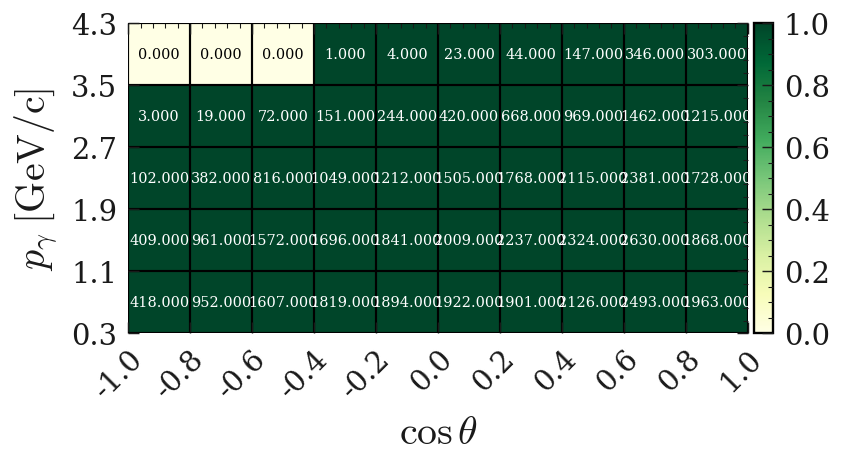

In [92]:
draw_2D_grid(h1)

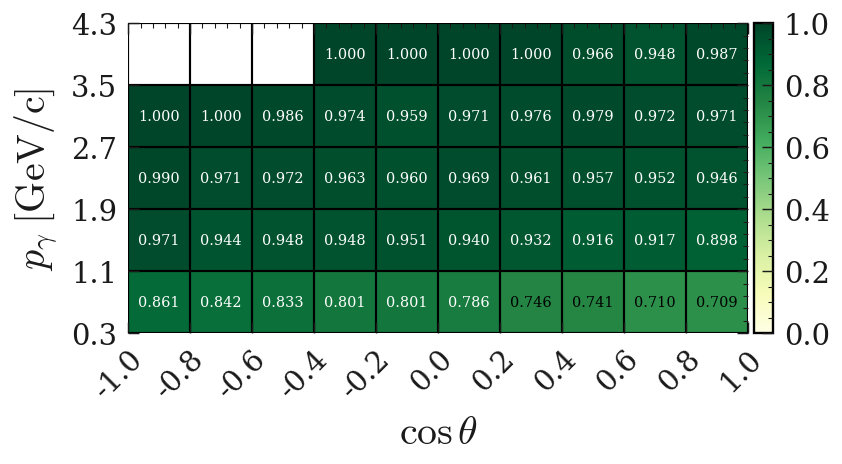

In [93]:
draw_2D_grid(h_omegag_random)

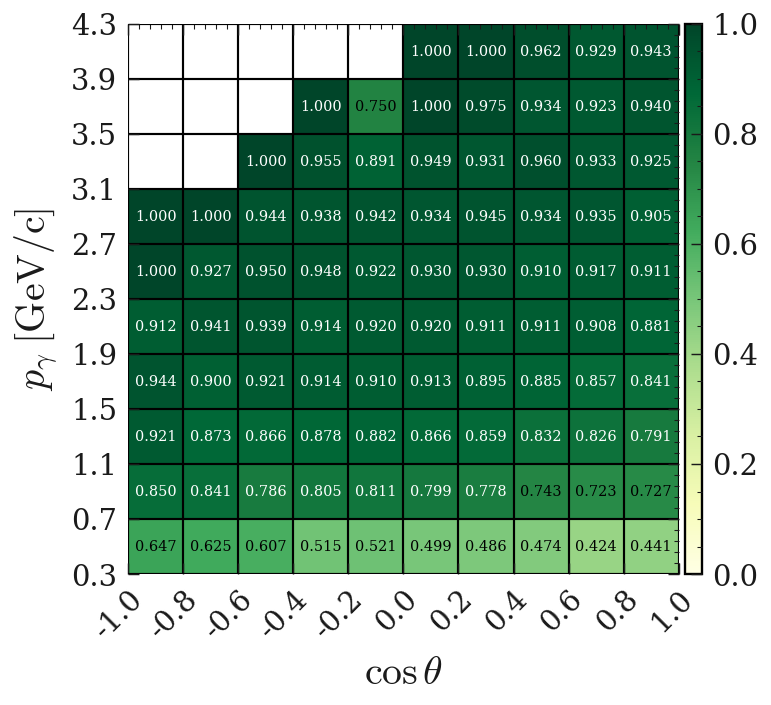

In [190]:
draw_2D_grid(h_omegag_random)

## D0's daughter condition

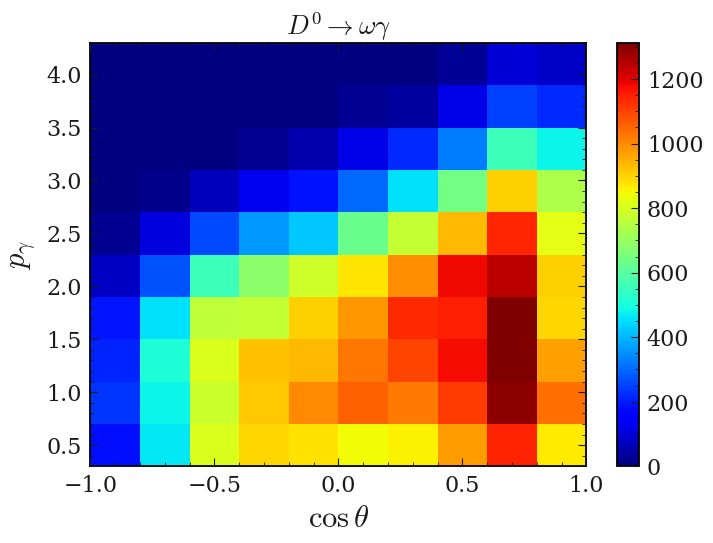

In [240]:
file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'omega'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  && gamma_genMotherPDG==421'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x1=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y1=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x1, y1,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \omega \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

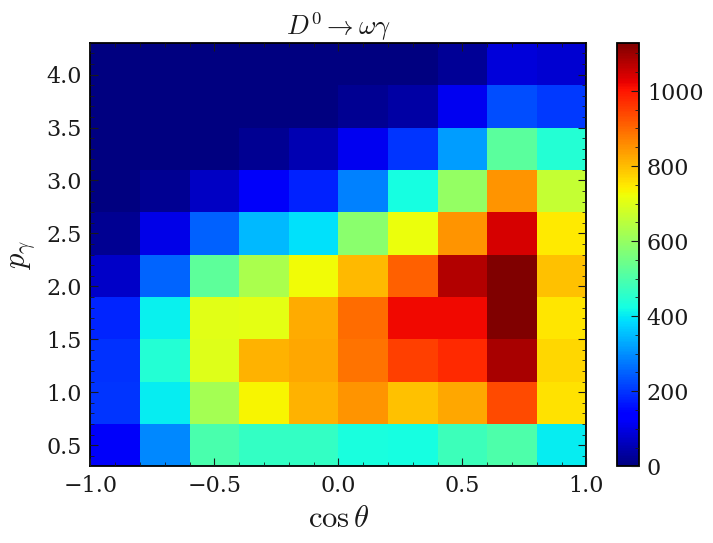

In [241]:
file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'omega'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8 && gamma_genMotherPDG==421'

variables = ['gamma_p','gamma_cosTheta']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

x2=pd_antiKstarpi0_sigMC['gamma_cosTheta']
y2=pd_antiKstarpi0_sigMC['gamma_p']

px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))
ybins = np.linspace(0.3, 4.3, 11)
xbins = np.linspace(-1, 1, 11)
plt.hist2d(x2, y2,bins=(xbins,ybins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$D^0 \rightarrow \omega \gamma$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\cos\theta$"
ylabel = r"$p_\gamma$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.colorbar()
plt.show()

/tmp/ipykernel_8038/2595166837.py:5: RuntimeWarning: invalid value encountered in true_divide
  h_omegag_realmother = h2 / h1


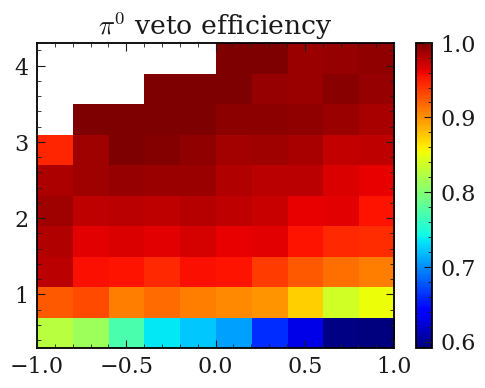

In [242]:
yedge = np.linspace(0.3, 4.3, 11)
xedge = np.linspace(-1, 1, 11)
h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_omegag_realmother = h2 / h1
fig = plt.figure(figsize=(576*px, 396*px))

ax = fig.add_subplot( title='$\pi^0$ veto efficiency')
pc = ax.pcolorfast(xedges, yedges, h_Kg_realmother.T, cmap=plt.cm.jet)


fig.colorbar(pc, ax = ax)



# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(X, Y, h)

# plt.colorbar()
plt.show()

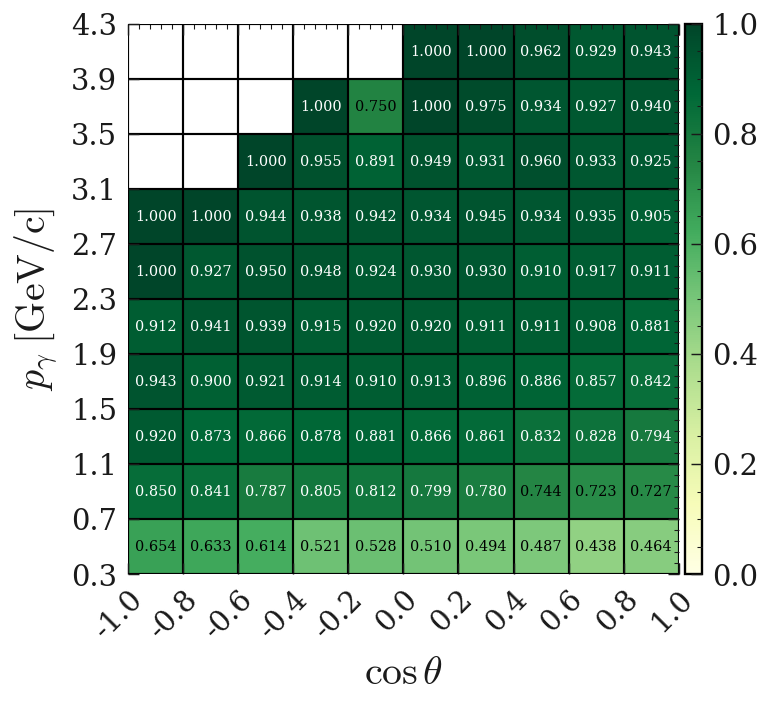

In [243]:
draw_2D_grid(h_omegag_realmother)

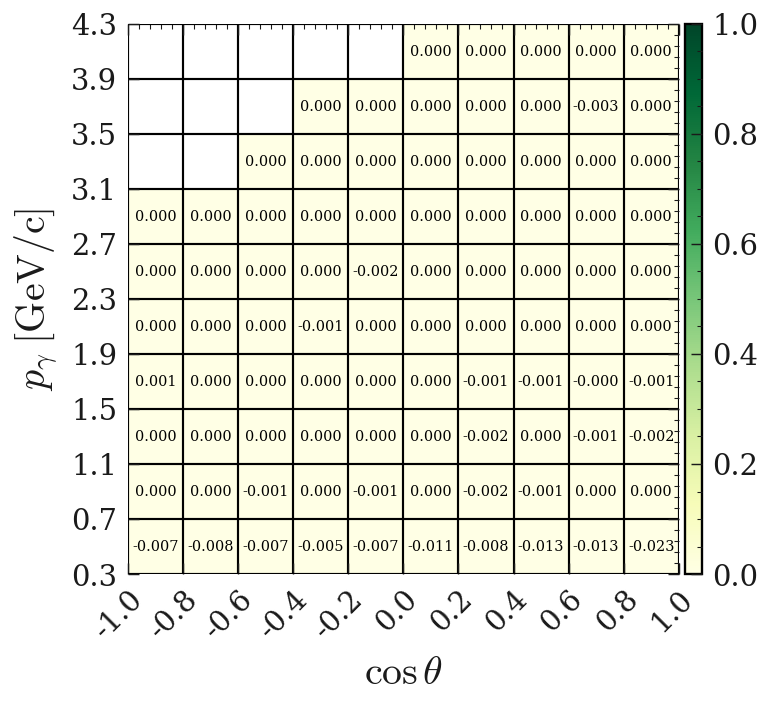

In [244]:
draw_2D_grid(h_omegag_random-h_omegag_realmother)

In [34]:
xedge = [-1, -0.8, -0.6,-0.4, -0.2 , 0 , 0.2 , 0.4 , 0.6, 0.8, 1]
yedge = [0,0.5, 1,1.5, 2,2.5, 3,3.5, 4]

h1_data, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2_data, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_data = h2_data / h1_data

/tmp/ipykernel_68453/4135134360.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_data = h2_data / h1_data


In [35]:
import matplotlib.cm as cm
import matplotlib.ticker as ticker

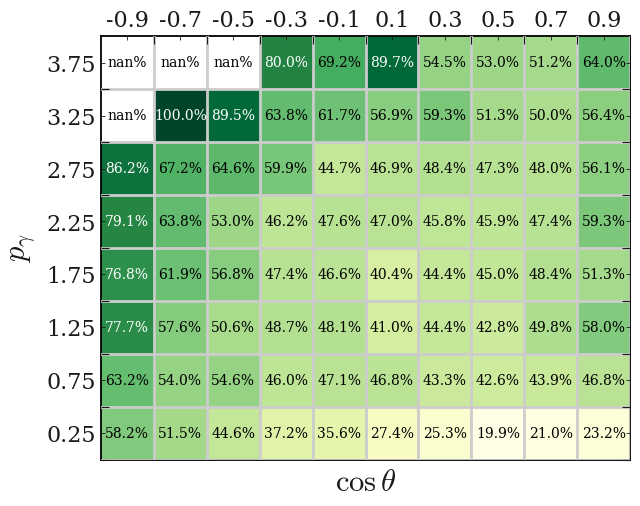

In [36]:
z = h_data # generate random data
z = np.flip(z, axis=1)
nx, ny = z.shape
indx, indy = np.arange(nx), np.arange(ny)

# indx = indx[::-1]
indy = indy[::-1]
x, y = np.meshgrid(indx, indy)

fig, ax = plt.subplots()
ax.imshow(z.T, interpolation="nearest", cmap=cm.YlGn) # plot grid values

for xval, yval in zip(x.flatten(), y.flatten()):
    zval = z[xval, yval]
    t = "%.1f%%"%(zval * 100,) # format value with 1 decimal point
    c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(xval, yval, t, color=c, va='center', ha='center',size=10)

#xlabels = 'abcdefghij'
xlabels = [-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9]
ylabels = [0.25, 0.75,1.25, 1.75,2.25, 2.75,3.25, 3.75]
#ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
#ax.set_yticks(indy+0.5)

ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
ax.grid(ls='-', lw=2)

# the tick labels, if you want them centered need to be adjusted in 
# this special way.
# for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy), 
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy),                          
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    #ind=ind-0.4
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

ax.xaxis.tick_top()

plt.ylabel("$p_\gamma$")
plt.xlabel(r"$\cos\theta$")

plt.show()

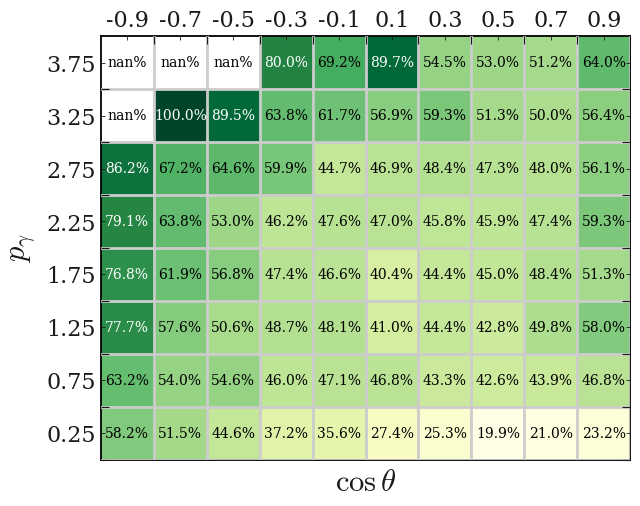

In [81]:
z = h_data # generate random data
z = np.flip(z, axis=1)
nx, ny = z.shape
indx, indy = np.arange(nx), np.arange(ny)

# indx = indx[::-1]
indy = indy[::-1]
x, y = np.meshgrid(indx, indy)

fig, ax = plt.subplots()
ax.imshow(z.T, interpolation="nearest", cmap=cm.YlGn) # plot grid values

for xval, yval in zip(x.flatten(), y.flatten()):
    zval = z[xval, yval]
    t = "%.1f%%"%(zval * 100,) # format value with 1 decimal point
    c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(xval, yval, t, color=c, va='center', ha='center',size=10)

#xlabels = 'abcdefghij'
xlabels = [-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9]
ylabels = [0.25, 0.75,1.25, 1.75,2.25, 2.75,3.25, 3.75]
#ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
#ax.set_yticks(indy+0.5)

ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
ax.grid(ls='-', lw=2)

# the tick labels, if you want them centered need to be adjusted in 
# this special way.
# for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy), 
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy),                          
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    #ind=ind-0.4
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

ax.xaxis.tick_top()

plt.ylabel("$p_\gamma$")
plt.xlabel(r"$\cos\theta$")

plt.show()

In [51]:
y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7]])

In [53]:
indy = indy[::-1]

In [58]:
z

array([[0.58181818, 0.63157895, 0.77707006, 0.76774194, 0.79104478,
        0.86206897,        nan,        nan],
       [0.51515152, 0.53992395, 0.57575758, 0.61933535, 0.63768116,
        0.671875  , 1.        ,        nan],
       [0.44632768, 0.54567308, 0.50561798, 0.56808511, 0.52991453,
        0.64634146, 0.89473684,        nan],
       [0.37155963, 0.46021505, 0.48697395, 0.47440945, 0.46153846,
        0.5989011 , 0.63829787, 0.8       ],
       [0.3559322 , 0.47058824, 0.48117155, 0.466     , 0.4764268 ,
        0.44670051, 0.61666667, 0.69230769],
       [0.2739726 , 0.46755725, 0.40983607, 0.40394973, 0.47034765,
        0.46886447, 0.56896552, 0.89655172],
       [0.25342466, 0.43300971, 0.44350759, 0.44424779, 0.4580292 ,
        0.48387097, 0.59333333, 0.54545455],
       [0.19871795, 0.42553191, 0.42811502, 0.45042017, 0.45855379,
        0.47309417, 0.51330798, 0.52991453],
       [0.20997375, 0.43888071, 0.49782293, 0.48401826, 0.4744186 ,
        0.47992701, 0.5     

In [59]:
np.flip(z, axis=0)

array([[0.23188406, 0.46830266, 0.57974138, 0.51313131, 0.59251969,
        0.56092843, 0.56372549, 0.64031621],
       [0.20997375, 0.43888071, 0.49782293, 0.48401826, 0.4744186 ,
        0.47992701, 0.5       , 0.51243781],
       [0.19871795, 0.42553191, 0.42811502, 0.45042017, 0.45855379,
        0.47309417, 0.51330798, 0.52991453],
       [0.25342466, 0.43300971, 0.44350759, 0.44424779, 0.4580292 ,
        0.48387097, 0.59333333, 0.54545455],
       [0.2739726 , 0.46755725, 0.40983607, 0.40394973, 0.47034765,
        0.46886447, 0.56896552, 0.89655172],
       [0.3559322 , 0.47058824, 0.48117155, 0.466     , 0.4764268 ,
        0.44670051, 0.61666667, 0.69230769],
       [0.37155963, 0.46021505, 0.48697395, 0.47440945, 0.46153846,
        0.5989011 , 0.63829787, 0.8       ],
       [0.44632768, 0.54567308, 0.50561798, 0.56808511, 0.52991453,
        0.64634146, 0.89473684,        nan],
       [0.51515152, 0.53992395, 0.57575758, 0.61933535, 0.63768116,
        0.671875  , 1.      

# gamma_p distribution

## signals

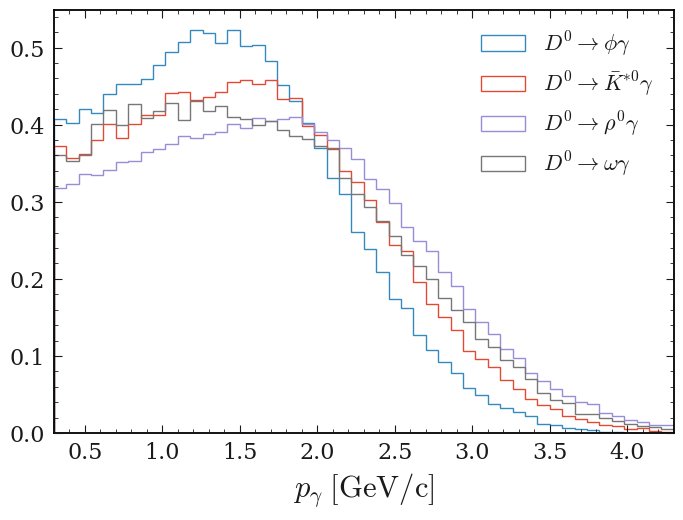

In [112]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_phig_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
tree = 'antiKstar'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_Kg_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_rhog_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_omegag_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_phig_sigMC['gamma_p']
h2=pd_Kg_sigMC['gamma_p']
h3=pd_rhog_sigMC['gamma_p']
h4=pd_omegag_sigMC['gamma_p']


xrange=(0.3,4.3)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \phi \gamma$",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$",density=True)
plt.hist(h3, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \rho^0 \gamma$",density=True)
plt.hist(h4, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \omega \gamma$",density=True)



px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

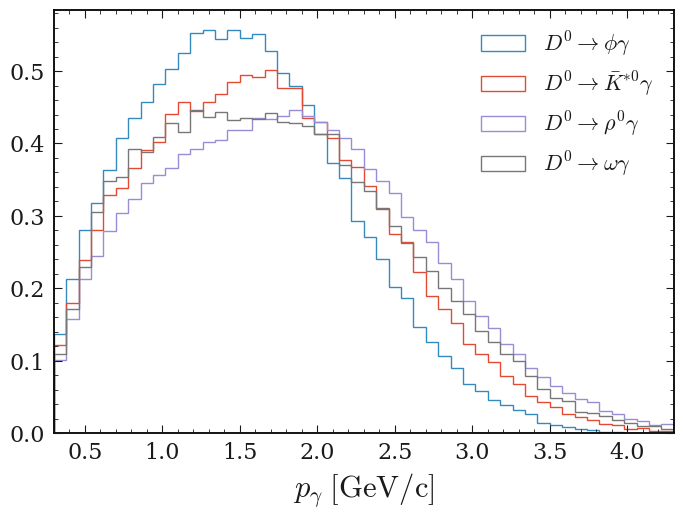

In [113]:
file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pi0veto_eff_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob <0.8 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_phig_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pi0veto_eff_signalMC_recon_mdst_antiKstar.root'
tree = 'antiKstar'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob <0.8 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_Kg_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pi0veto_eff_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob <0.8 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_rhog_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/omega/trainv2new_pi0veto_eff_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob <0.8  '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_omegag_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_phig_sigMC['gamma_p']
h2=pd_Kg_sigMC['gamma_p']
h3=pd_rhog_sigMC['gamma_p']
h4=pd_omegag_sigMC['gamma_p']


xrange=(0.3,4.3)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \phi \gamma$",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$",density=True)
plt.hist(h3, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \rho^0 \gamma$",density=True)
plt.hist(h4, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \omega \gamma$",density=True)



px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

## calibration

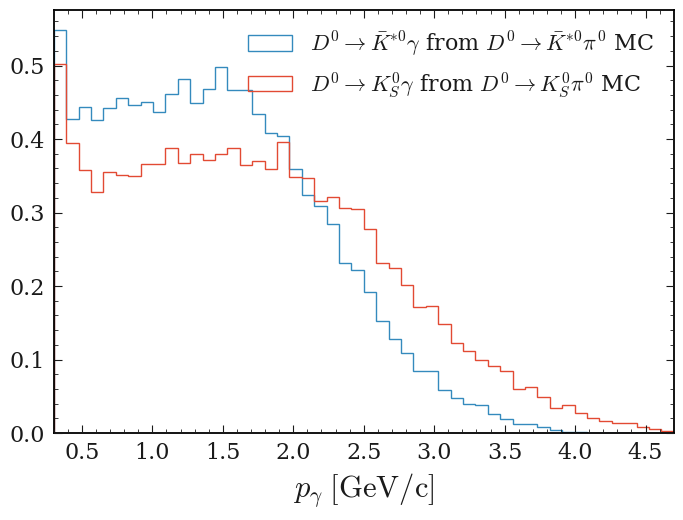

In [123]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['gamma_p']
h2=pd_kshortpi0_sigMC['gamma_p']



xrange=(0.3,4.7)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

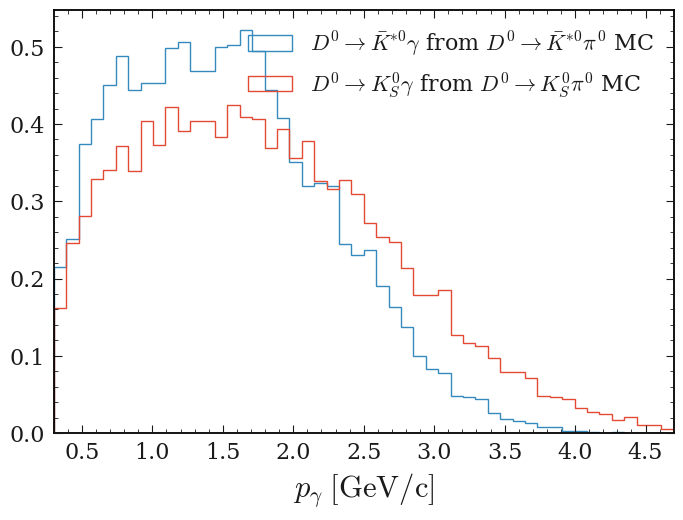

In [124]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['gamma_p']
h2=pd_kshortpi0_sigMC['gamma_p']



xrange=(0.3,4.7)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

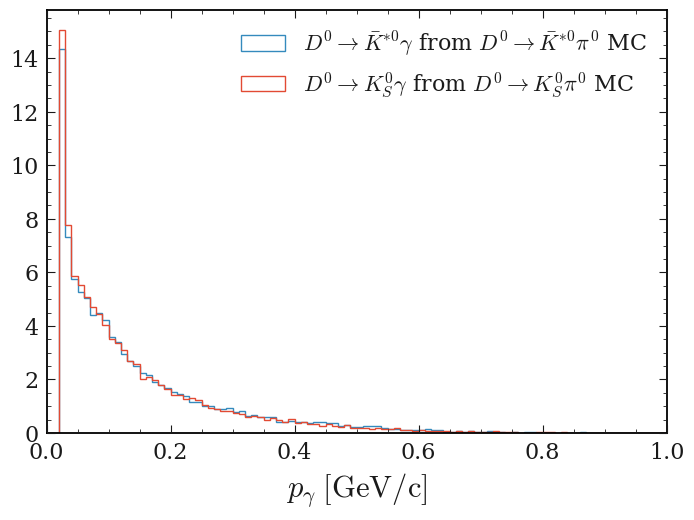

In [128]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['Pi0_soft_E']
h2=pd_kshortpi0_sigMC['Pi0_soft_E']



xrange=(0.,1)
xbins = np.linspace(*xrange,101)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

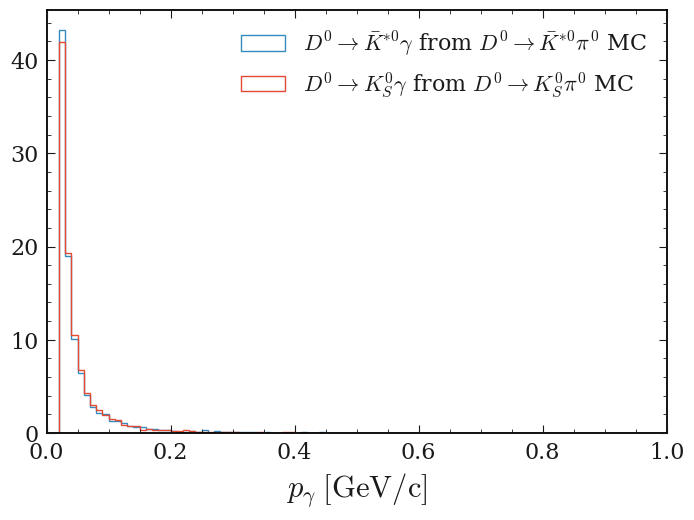

In [129]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['Pi0_soft_E']
h2=pd_kshortpi0_sigMC['Pi0_soft_E']



xrange=(0.,1)
xbins = np.linspace(*xrange,101)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

# D0_M distribution

## signals

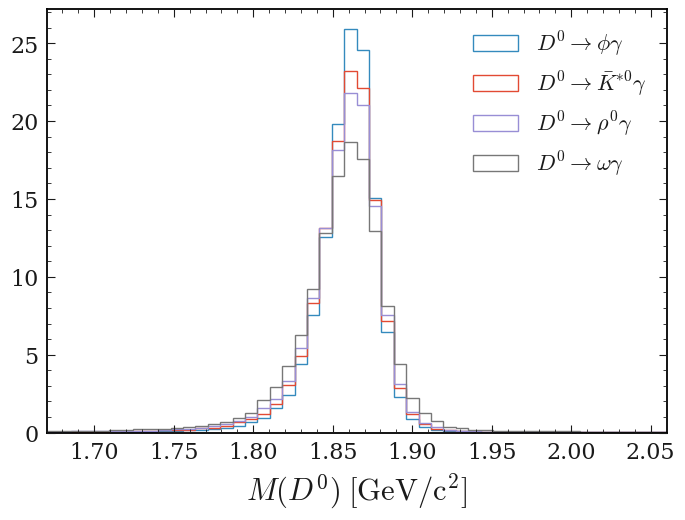

In [47]:
file = '/media/jykim/T7/storage/01_recon/phi/v6_sig_ext_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_phig_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/antiKstar/v6_sig_ext_signalMC_recon_mdst_antiKstar.root'
tree = 'antiKstar'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_Kg_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/rho/v6_sig_ext_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_rhog_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/omega/v6_sig_ext_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_omegag_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_phig_sigMC['D0_M']
h2=pd_Kg_sigMC['D0_M']
h3=pd_rhog_sigMC['D0_M']
h4=pd_omegag_sigMC['D0_M']


xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \phi \gamma$",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$",density=True)
plt.hist(h3, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \rho^0 \gamma$",density=True)
plt.hist(h4, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \omega \gamma$",density=True)



px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$M(D^0) \; [\mathrm{GeV/c^2}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

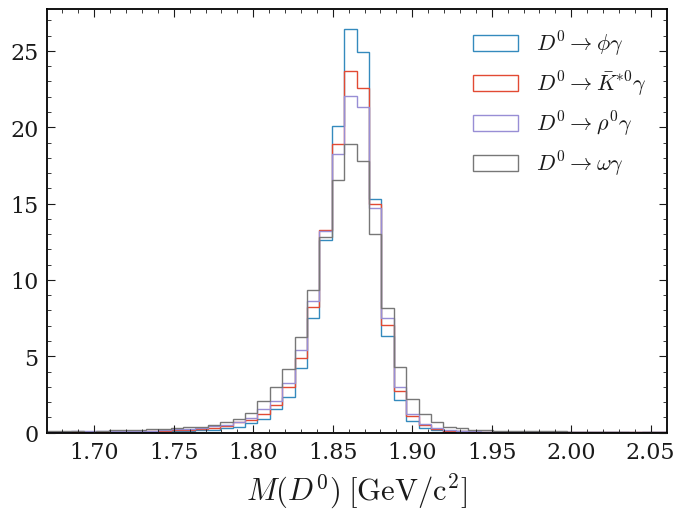

In [48]:
file = '/media/jykim/T7/storage/01_recon/phi/v6_sig_ext_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_phig_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/antiKstar/v6_sig_ext_signalMC_recon_mdst_antiKstar.root'
tree = 'antiKstar'
base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_Kg_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/rho/v6_sig_ext_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_rhog_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/omega/v6_sig_ext_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_omegag_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_phig_sigMC['D0_M']
h2=pd_Kg_sigMC['D0_M']
h3=pd_rhog_sigMC['D0_M']
h4=pd_omegag_sigMC['D0_M']


xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \phi \gamma$",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$",density=True)
plt.hist(h3, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \rho^0 \gamma$",density=True)
plt.hist(h4, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \omega \gamma$",density=True)



px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$M(D^0) \; [\mathrm{GeV/c^2}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

## calibration

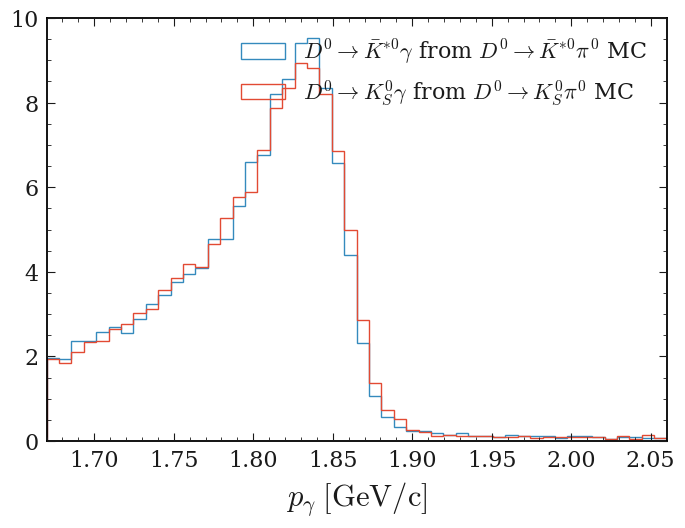

In [59]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'
# base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['D0_M']
h2=pd_kshortpi0_sigMC['D0_M']



xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

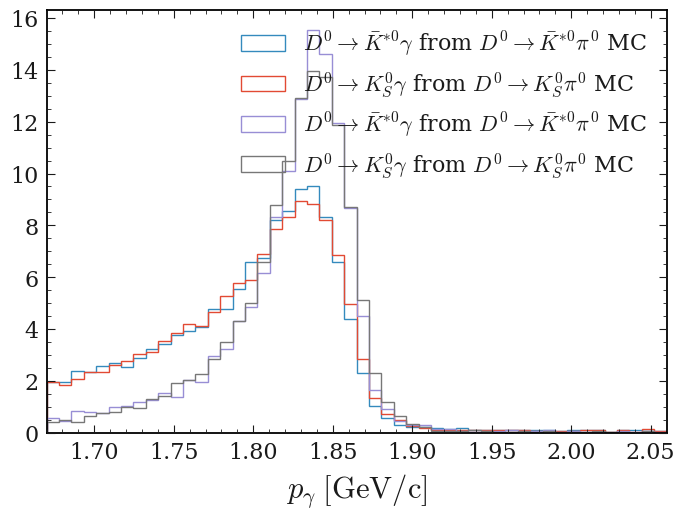

In [60]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'
# base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['D0_M']
h2=pd_kshortpi0_sigMC['D0_M']



xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)


file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'

tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['D0_M']
h2=pd_kshortpi0_sigMC['D0_M']



xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)



px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

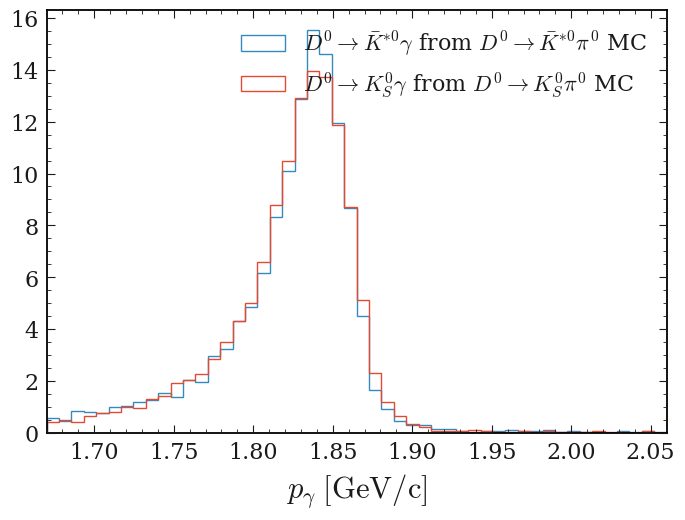

In [57]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/v6_signal_extraction_signalMC_recon_mdst.root'

tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['D0_M']
h2=pd_kshortpi0_sigMC['D0_M']



xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

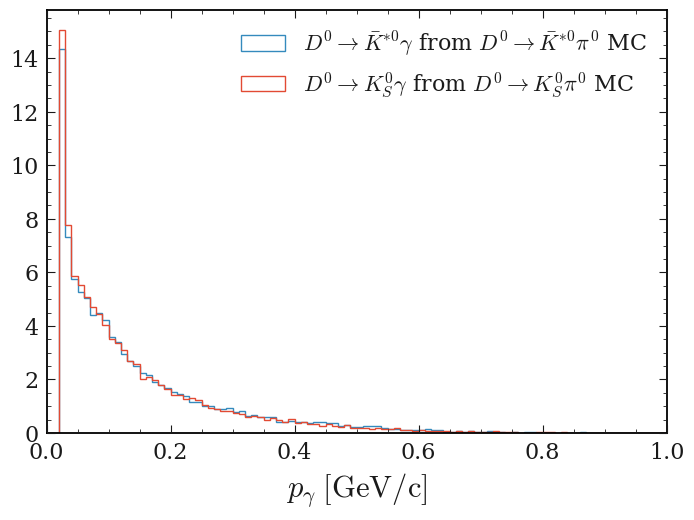

In [128]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['Pi0_soft_E']
h2=pd_kshortpi0_sigMC['Pi0_soft_E']



xrange=(0.,1)
xbins = np.linspace(*xrange,101)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()

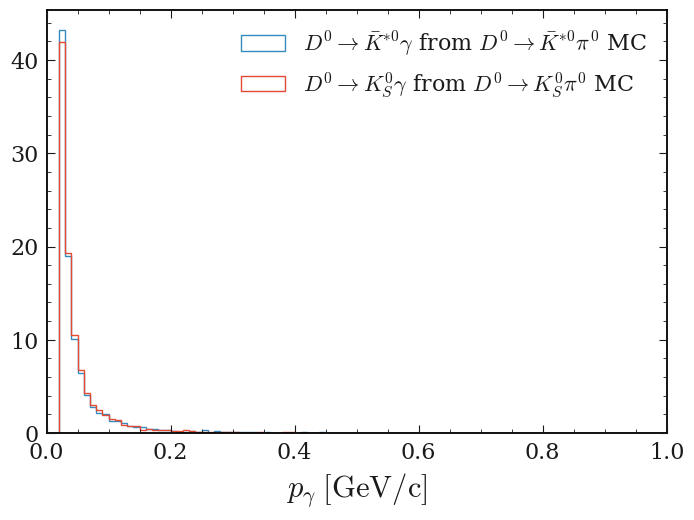

In [129]:
file = '/media/jykim/T7/storage/01_recon/D2antiKstarpi0/trainv2new_pi0veto_eff_signalMC_recon_mdst_1M.root'
tree = 'antiKstar'

base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_antiKstarpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)

file = '/media/jykim/T7/storage/01_recon/kshort/trainv2new_pi0veto_eff_signalMC_recon_mdst.root'
#file = '/media/jykim/T7/storage/01_recon/kshort/trainv3_gE_700MEV_sig_extraction_signalMC_recon_mdst_1M.root'

tree = 'kshort'

#base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && gamma_genMotherPDG==111'
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
#base_filter = 'Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
variables = ['gamma_p','gamma_cosTheta','gamma_genMotherPDG','D0_M','Pi0_Prob','Pi0_soft_E']
pd_kshortpi0_sigMC = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)


h1=pd_antiKstarpi0_sigMC['Pi0_soft_E']
h2=pd_kshortpi0_sigMC['Pi0_soft_E']



xrange=(0.,1)
xbins = np.linspace(*xrange,101)

plt.hist(h1, bins=xbins, histtype='step',label=r"$D^0 \rightarrow \bar{K}^{*0} \gamma$ from $D^0 \rightarrow \bar{K}^{*0} \pi^0$ MC",density=True)
plt.hist(h2, bins=xbins, histtype='step',label=r"$D^0 \rightarrow K_S^0 \gamma$ from $D^0 \rightarrow K_S^0 \pi^0$ MC",density=True)




px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

plt.xlim(xrange)


#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
#plot_title=r"$D^0 \rightarrow V \gamma$"

#plt.title(plot_title)
ax = plt.gca()
xlabel = r"$p_\gamma \; [\mathrm{GeV/c}]$"
ax.set_xlabel(xlabel)
plt.legend()

plt.show()